**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  


<div class="alert alert-info" role="alert">
Dear Reviewer, 
    
<br>Thank you for reviewing my work. 
    
    
<br>I worked on the project locally (as I always do) by installing and setting up the environment fully for ARIMA, ETS, fbprophet. I then uploaded the file to JupyterHub on the Platform and tried to make it work there. I got as far as installing pystan 2.19.1.1. I could not get fbprophet to install due to some errors, which one of the instructors suspected was due to an incompatibility with the version of Python installed on the Platform. I was told it was not possible to change the Python version just for me, and hence I requested for and received a permission to upload the file as is with the results I got in my local environment. 
    
    
<br>Rena Bracha
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Ok, no problem!
    
Unfortunately, the data was resampled in a different way from what was required, so you were essentially working on a different task (see comments below for more information). So I didn't comment much about the conclusions, but just on the methods. I hope you won't be discouraged too much, but these problems will need to be fixed before the project can be accepted. I'll just say it's really cool that you're trying stuff that goes far beyond the requirements of the projects, and I admire people who aren't afrarid to try something new even if they have to spend a few hours dealing with some weird errors to install a library! Good luck!
	  
</div>

<div class="alert alert-info" role="alert">
Hi Dmitry, 
    
<br>Great to have you review my project as always. 
    
    
<br>I tried to make corrections where you pointed out. I would appreciate it if you could go over my update marked "v.2". Thank you.  
    
    
<br>Rena Bracha
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Hi Rena! Thanks for taking the time to improve the project! Most of the problems are fixed.
    
I replied to your comments, and there's one more tiny thing that I asked to fix (namely, for the xgboost model you added, the hyperparameters are tuned using the train scores with optuna). Also, I tried to explain why ARIMA and prophet were at a disadvantage to other models somewhere below the now commented out prophet part.
	  
</div>

<div class="alert alert-info" role="alert">
Dmitry, hi again!
    
<br>Thank you taking the time to go over the updates in detail and also for providing additional explanations as always. I would appreciate it if you could go over my update marked "V3". Thank you!
    
    
<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
The problem with cross-validation is fixed now! I replied to your new comments :) The project is accepted though. Good luck on the next sprint!
	  
</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Conclusion
We trained and evaluted four models which have a reputation of being good at solving time series forecasting problems. All models passed the constant model baseline and the project threshold. They are ranked in the order of good performance as follows: Linear Regression, Prophet, ARIMA and ETS. In terms of utility, Prophet tops them all, followed by ARIMA. 

## Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Preparation](#chapter1)
* [Analysis](#chapter2)
* [Training](#chapter3)
* [Testing](#chapter4)

## Preparation

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt, argmax, mean, absolute, std, sort
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from tqdm.auto import tqdm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split, learning_curve, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedKFold

!pip install xgboost
import xgboost as xgb
import time

!pip install optuna
import optuna
from sklearn.pipeline import Pipeline
#!python -m pip install pystan==2.19.1.1
#!pip install prophet
#!pip install cmdstanpy==0.9.68
#!pip install fbprophet
#!pip install cmdstanpy==0.9.5-
#from prophet.diagnostics import cross_validation
#from prophet.diagnostics import performance_metrics

In [2]:
# for using progress_apply
tqdm.pandas()

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
It's preferable to put all imports at the beginning of the project, otherwise if someone wants to run your project, and don't have all the dependencies installed, they have to hunt for imports all over the notebook :)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
I moved all the imports to the top of the project.
        
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Thanks!
	  
</div>

First take a look at the first 500 rows.

In [5]:
try:
    data = pd.read_csv('./datasets/taxi.csv', sep=',', nrows=500)
except:
    data = pd.read_csv('/datasets/taxi.csv', sep=',', nrows=500)

In [6]:
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    500 non-null    object
 1   num_orders  500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


* 'datetime': convert from object data type to datetime object type; make it into the index of the dataframe.


Load the whole dataset.

In [8]:
try:
    data = pd.read_csv('./datasets/taxi.csv', sep=',', parse_dates=[0], index_col=[0])
except:
    data = pd.read_csv('/datasets/taxi.csv', sep=',', parse_dates=[0], index_col=[0])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


* 26496 rows, 1 column
* The date ranges from 2018-03-01 00:00:00 to 2018-08-31 23:50:00. We will not be able to see an annual seasonality even if there was one. We will have to be satisfied with monthly, weekly or daily patterns.
* No missing values.

In [10]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


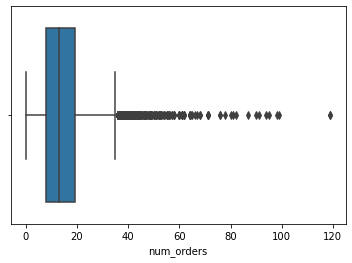

In [11]:
sns.boxplot(data=data, x='num_orders')
plt.show();

* The mean and the median are very close.
* The maximum is way up high. 

Let us remove the outlier. 

In [12]:
# data = data[data['num_orders']<119]

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
You should probably just leave it, considering it is a time series
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
I understand that removing outliers is especially tricky in time series data since it can cause gaps in the sequential continuation of the data. I will not remove the data points that are seemingly outliers at this point until I can check the trend and seasonality later. 
        
</div>

We are required to predict the amount of taxi orders for the next hour. The data is currently in ten-minute intervals. We will resample to make our data available at the same frequency that we need to make predictions, in hours. Verify that the dates are times in the index are in chronological order. 

In [13]:
# sort the index in ascending order
data.sort_index(inplace=True)
data2 = data.resample('1H').sum() # data2 starts here
data2.index.is_monotonic

True

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
You loaded the data, and made sure it's sorted chronologically. But unfortunately, the resampling is incorrect. Let's think about what `data.resample('1H').mean()` does: originally we have data in ten-minute intervals, so it takes all ten-minute intervals that comprise an hour, and takes their mean. So the result is the mean number of orders done in ten-minute intervals during this hour. But what we would like to predict is the *total* number of orders in an hour. Sadly, this invalidates all of the results, because you were doing a completely different thing.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
Of course! I have now replaced mean() with sum() to calculate the total number of orders in an hour. 
        
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Great!
	  
</div>

## Analysis

In [14]:
data2.head(60)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


* The number of orders seems to peak twice daily: around midnight and around brunch time. 

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>
    
I checked the distribution and tried transformation. 
        
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok!
	  
</div>

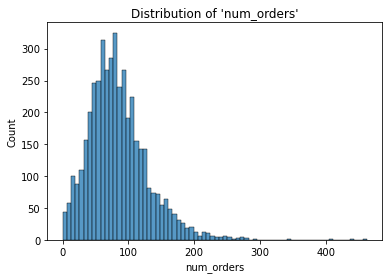

In [15]:
# plot a histogram
sns.histplot(data2['num_orders'])
plt.title("Distribution of 'num_orders'")
plt.show();

* It is skewed to the left with some very large number of orders. 

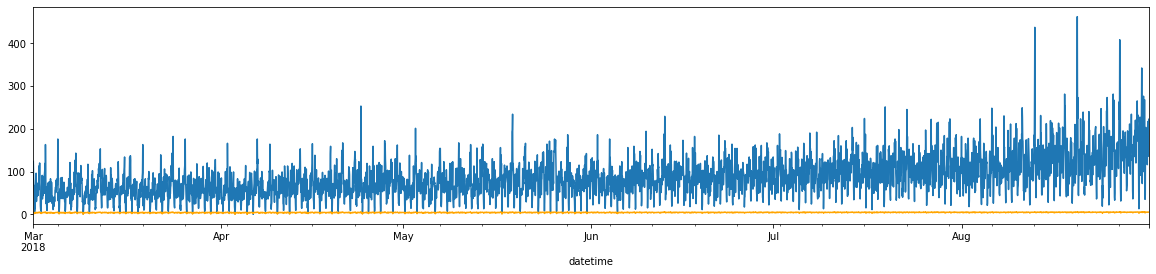

In [16]:
# see if the distribution can be made linear by log transform
fig = plt.figure(figsize=(20, 4))
data2['num_orders'].plot()
np.log(data2['num_orders']).plot(color='orange')
plt.show();

In [42]:
np.log(data2['num_orders']).isna().sum()

0

In [43]:
data2[np.log(data2['num_orders'])==0]

,num_orders,rolling_mean,rolling_std
datetime,,,
2018-03-09 05:00:00,1,60.8,35.785782
2018-04-03 06:00:00,1,45.8,31.018991
2018-04-05 06:00:00,1,57.7,32.927699


* The data has been flattened. But it does not seem like a good idea to transform the data using natural log since there are rows where 'num_orders'=1 and ln(1)=0, which means we lose data. Also, there are ML models that require the data to be strictly positive. 

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
There's also [`np.log1p()`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), which is `log(1+x)`; might work
	  
</div>

In [55]:
# testing, testing...
np.log(1)
np.log(0)
np.log1p(1)
np.log1p(0)

0.0

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>
    
Nice! I will try that next time. 
        
</div>

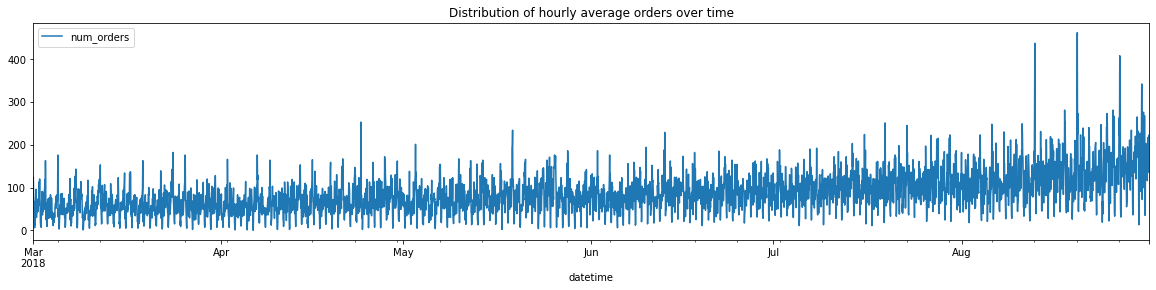

In [19]:
# plot a graph
fig = plt.figure(figsize=(20, 4))
ax = fig.gca() # gca: get current axes2
data2.plot(ax=ax)
plt.title("Distribution of hourly average orders over time")
plt.show();

* The graph is neither in an upward nor in a downward slope - it is pretty much stationary around the mean. We will verify this statistically later.
* The number of taxi orders seems to increase in August. We will check the seasonality later. 

Since there is a lot of data packed into the six-month period, making it difficult to see patterns, let us apply the following techniques to remove the random variation and reveal the underlying trend, or seasonality or cyclic pattern present in the time series data.

a) Moving average: reduce the fluctuations in the time series by aggregating by mean
<br>b) Automatic time series decomposition: decompose the time series into trend, seasonal and residual components

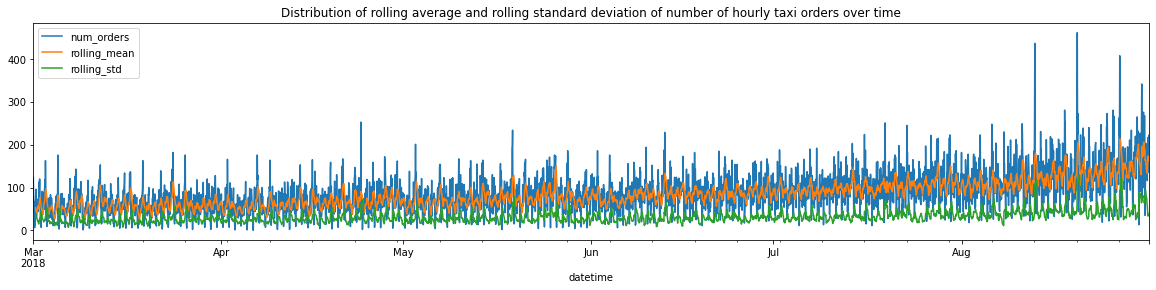

In [20]:
# a) Moving average
data2['rolling_mean'] = data2['num_orders'].rolling(10).mean()
data2['rolling_std'] = data2['num_orders'].rolling(10).std()
fig = plt.figure(figsize=(20, 4))
ax = fig.gca() # gca: get current axes
data2.plot(ax=ax)
plt.title("Distribution of rolling average and rolling standard deviation of number of hourly taxi orders over time")
plt.show();

* The standard deviation looks pretty stable and constant, but the mean seems to increase in August. We will look into the mean later. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Very nice, you looked at the moving average and standard deviation
	  
</div>

In [21]:
# b) Automatic time series decomposition
decomposed = seasonal_decompose(data2['num_orders'], model='additive', period=6)

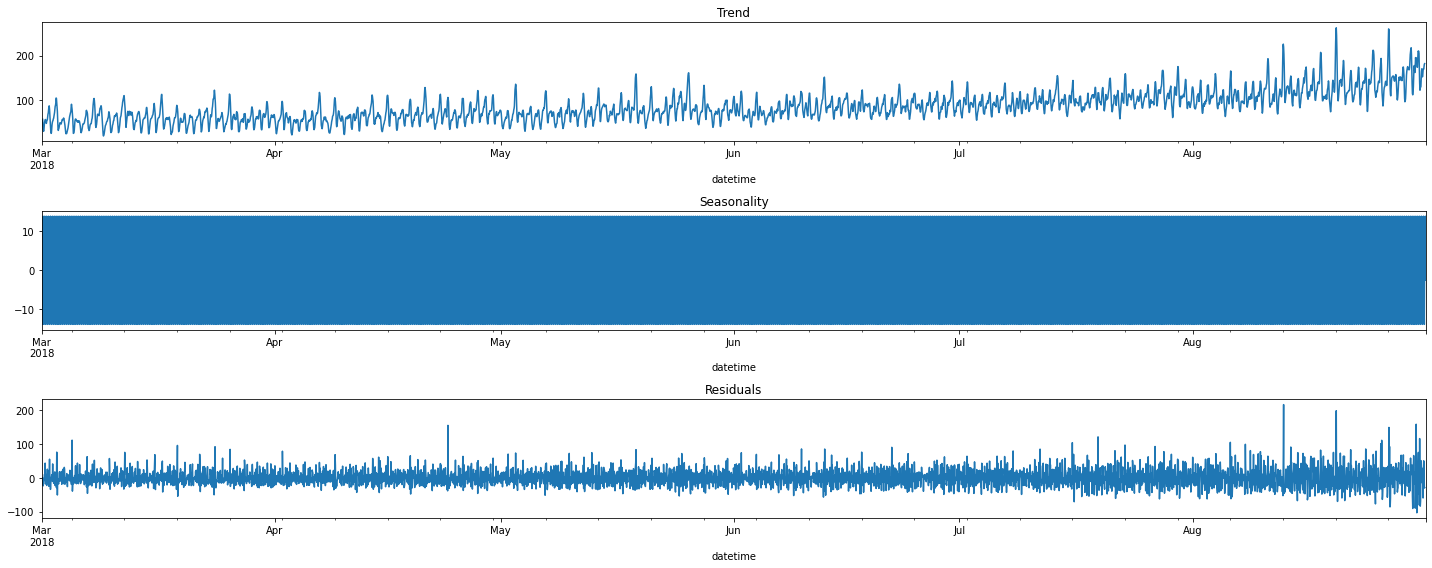

In [22]:
plt.figure(figsize=(20, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca()) # trend
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) # seasonality
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) # residual
plt.title('Residuals')
plt.tight_layout()    # this helps fit subplots into the area 

* The number of orders seems to peak twice daily: around midnight and around brunch time. 
* No seasonality. The same up-and-down pattern is repeated everyday, regardless of the month. 
* In most months, it peaked on Saturdays - only in August, it peaked on Mondays. 


* The residuals of the decomposition do not have any pattern left over. Setting model='multiplicative' produced a similar result for all the months, so we are good with model='additive. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Instead of looking at a seasonal decomposition of a small slice of data, I would suggest looking at a small slice of the decomposed whole dataset. 
	  
</div>

Let us look at the trend of the whole dataset in more detail. 

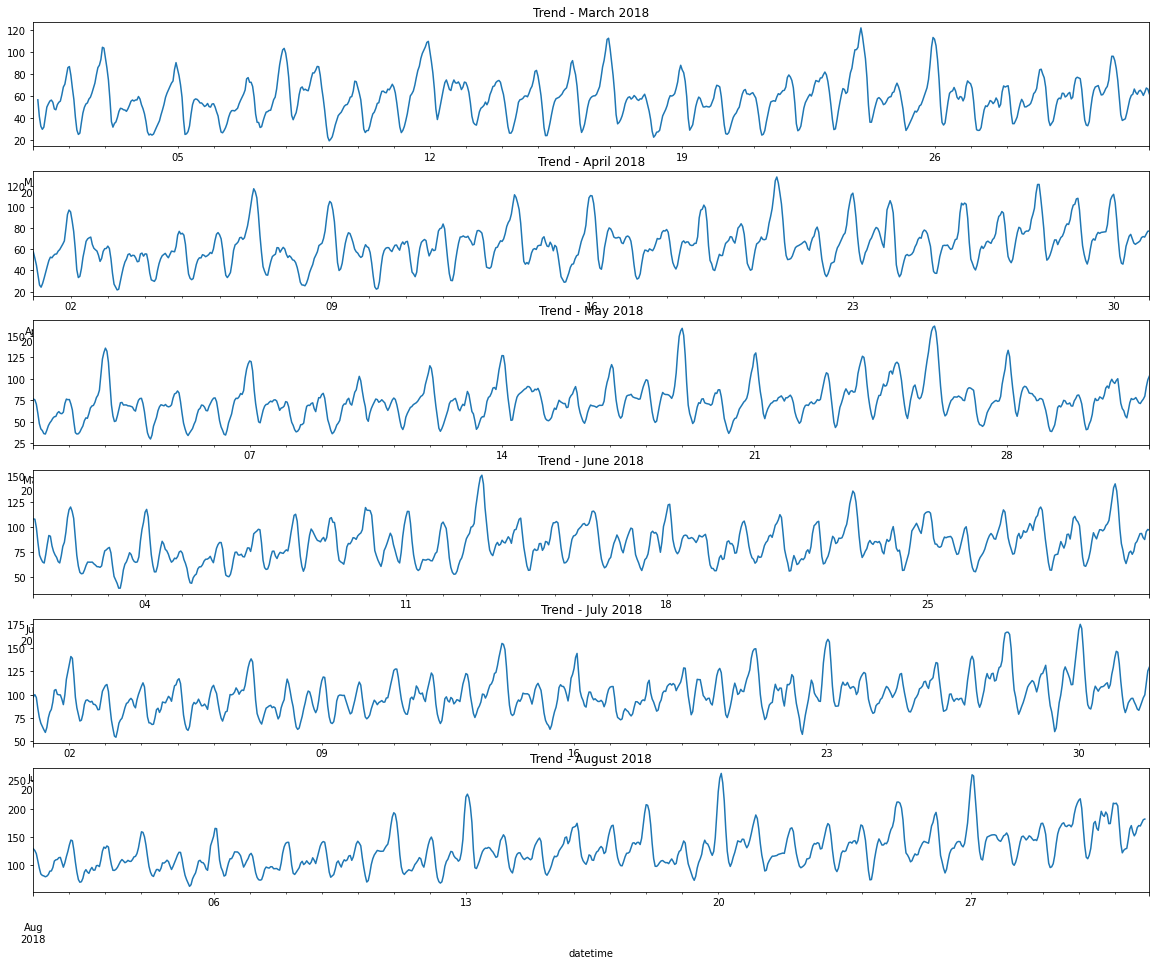

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed.trend['2018-03-01':'2018-03-31'].plot(ax=plt.gca()) # trend
plt.title('Trend - March 2018')
plt.subplot(612)
decomposed.trend['2018-04-01':'2018-04-30'].plot(ax=plt.gca()) # trend
plt.title('Trend - April 2018')
plt.subplot(613)
decomposed.trend['2018-05-01':'2018-05-31'].plot(ax=plt.gca()) # trend
plt.title('Trend - May 2018')
plt.subplot(614)
decomposed.trend['2018-06-01':'2018-06-30'].plot(ax=plt.gca()) # trend
plt.title('Trend - June 2018')
plt.subplot(615)
decomposed.trend['2018-07-01':'2018-07-31'].plot(ax=plt.gca()) # trend
plt.title('Trend - July 2018')
plt.subplot(616)
decomposed.trend['2018-08-01':'2018-08-31'].plot(ax=plt.gca()) # trend
plt.title('Trend - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

* The number of orders seems to peak twice daily: around midnight and around brunch time. 
* In most months, it peaked on Saturdays - only in August, it peaked on Mondays. 


Let us look at the seasonality of the whole dataset in more detail. 

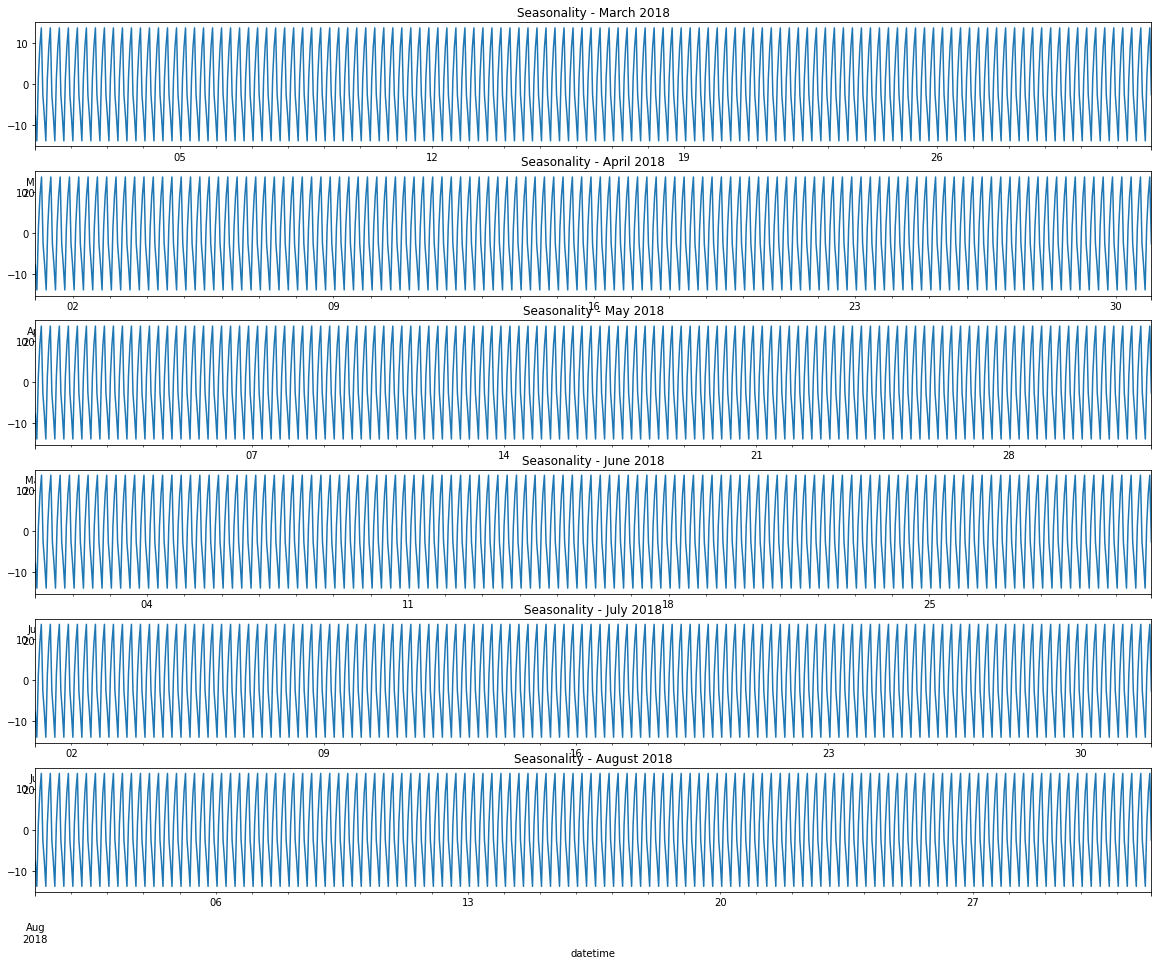

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed.seasonal['2018-03-01':'2018-03-31'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality - March 2018')
plt.subplot(612)
decomposed.seasonal['2018-04-01':'2018-04-30'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality - April 2018')
plt.subplot(613)
decomposed.seasonal['2018-05-01':'2018-05-31'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality - May 2018')
plt.subplot(614)
decomposed.seasonal['2018-06-01':'2018-06-30'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality - June 2018')
plt.subplot(615)
decomposed.seasonal['2018-07-01':'2018-07-31'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality - July 2018')
plt.subplot(616)
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

* No seasonality. The same up-and-down pattern is repeated everyday, regardless of the month. 

Let us look at the residuals of the whole dataset in more detail to see if any patterns have been left uncaptured by the method. 

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Seasonality doesn't have to depend on month, it's the same thing as 'a periodic pattern', in this case, there seems to be a daily pattern as you noted (you could zoom in even further: to a slice of just a couple of days to see it more clearly)
	  
</div>

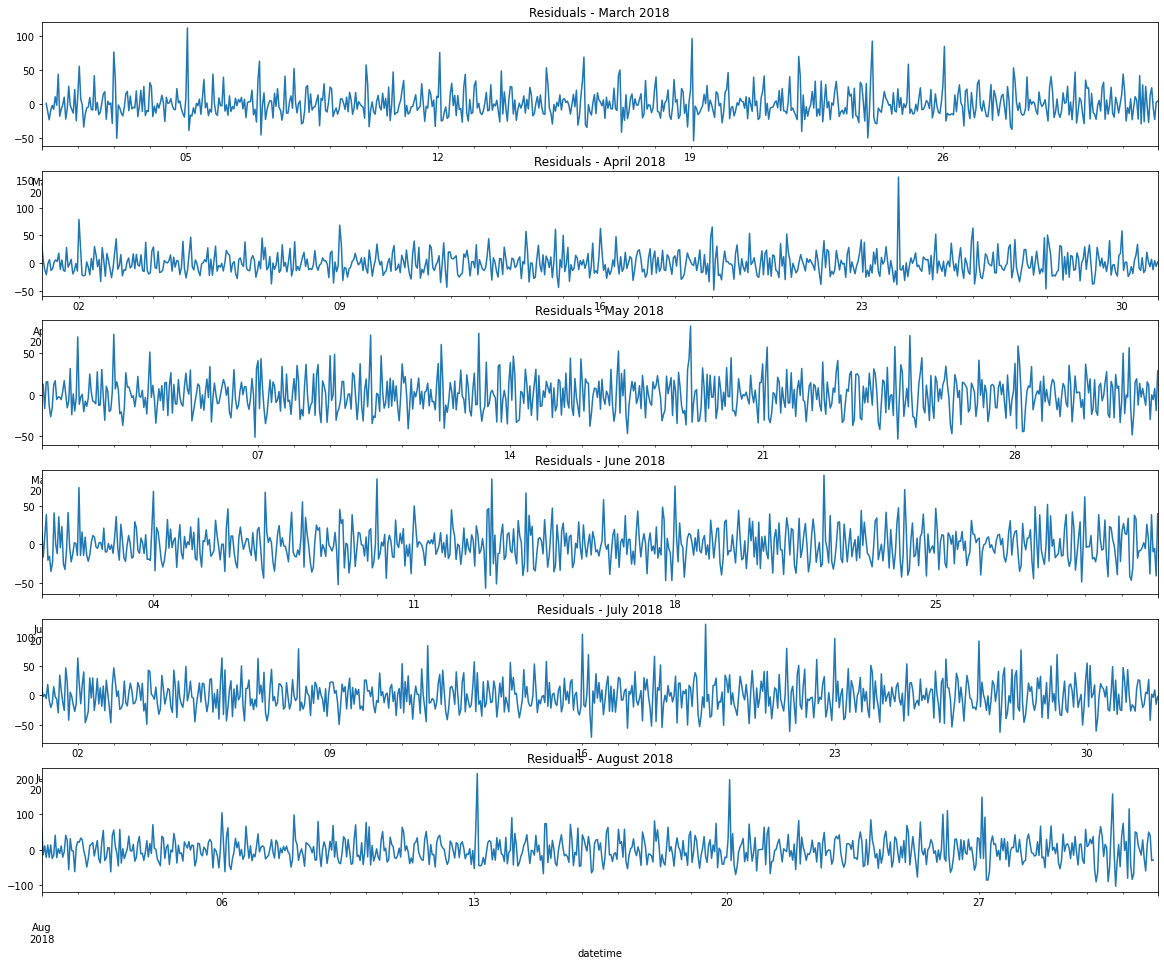

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed.resid['2018-03-01':'2018-03-31'].plot(ax=plt.gca()) # residual
plt.title('Residuals - March 2018')
plt.subplot(612)
decomposed.resid['2018-04-01':'2018-04-30'].plot(ax=plt.gca()) # residual
plt.title('Residuals - April 2018')
plt.subplot(613)
decomposed.resid['2018-05-01':'2018-05-31'].plot(ax=plt.gca()) # residual
plt.title('Residuals - May 2018')
plt.subplot(614)
decomposed.resid['2018-06-01':'2018-06-30'].plot(ax=plt.gca()) # residual
plt.title('Residuals - June 2018')
plt.subplot(615)
decomposed.resid['2018-07-01':'2018-07-31'].plot(ax=plt.gca()) # residual
plt.title('Residuals - July 2018')
plt.subplot(616)
decomposed.resid['2018-08-01':'2018-08-31'].plot(ax=plt.gca()) # residual
plt.title('Residuals - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

* In June 2018, there seems to be a peak that occurs every five days or so, which maybe indicative of some left-over pattern. In other months, there is no regular repetition that can be construed as a pattern. 

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
I took the trend, seasonality and the residuals of the whole dataset, and looked each month separately. 
    
<br>What we see in the graph of redisuals for the June 2018 data - is this considered a pattern? And if so, is it enough at this point to just report that there seems to be some pattern left since all we are trying to do is to see if the distribution is stationary or not).
        
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
I don't think there's much of a pattern, looks like random noise, as the residuals should
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>
    
Thank you for confirming that there is no discernible pattern. 

    
<br>So I took the first three days of the month and checked the trend, seasonality and residual for each month. 

* Trend: we can see the daily pattern more pronounced here - the number of orders seems to peak twice daily: around midnight and around brunch time.
* Seasonality: nothing to write home about. 
* Residual: we can see the peak at the start of the day, especially in May and June. That means there are still patterns left that should be extracted. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>
	  
In general, this seasonal decomposition is for getting an overview of the data, not for getting some precise patterns, and looking for peaks or some kind of periodicity in trend and residuals will probably be very misleading
	  
</div>

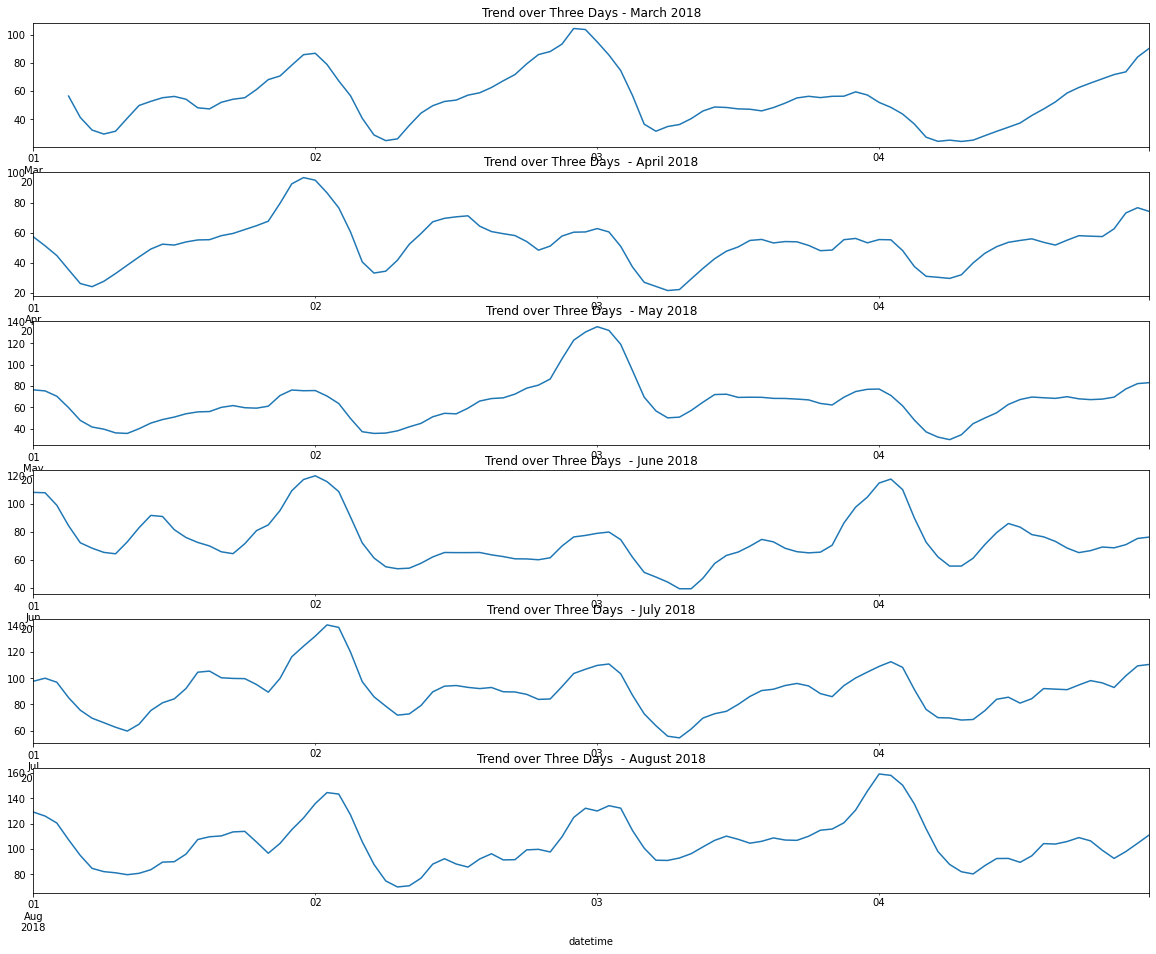

<Figure size 432x288 with 0 Axes>

In [63]:
# take a look at a period of three days in each month
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed.trend['2018-03-01':'2018-03-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days - March 2018')
plt.subplot(612)
decomposed.trend['2018-04-01':'2018-04-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - April 2018')
plt.subplot(613)
decomposed.trend['2018-05-01':'2018-05-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - May 2018')
plt.subplot(614)
decomposed.trend['2018-06-01':'2018-06-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - June 2018')
plt.subplot(615)
decomposed.trend['2018-07-01':'2018-07-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - July 2018')
plt.subplot(616)
decomposed.trend['2018-08-01':'2018-08-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

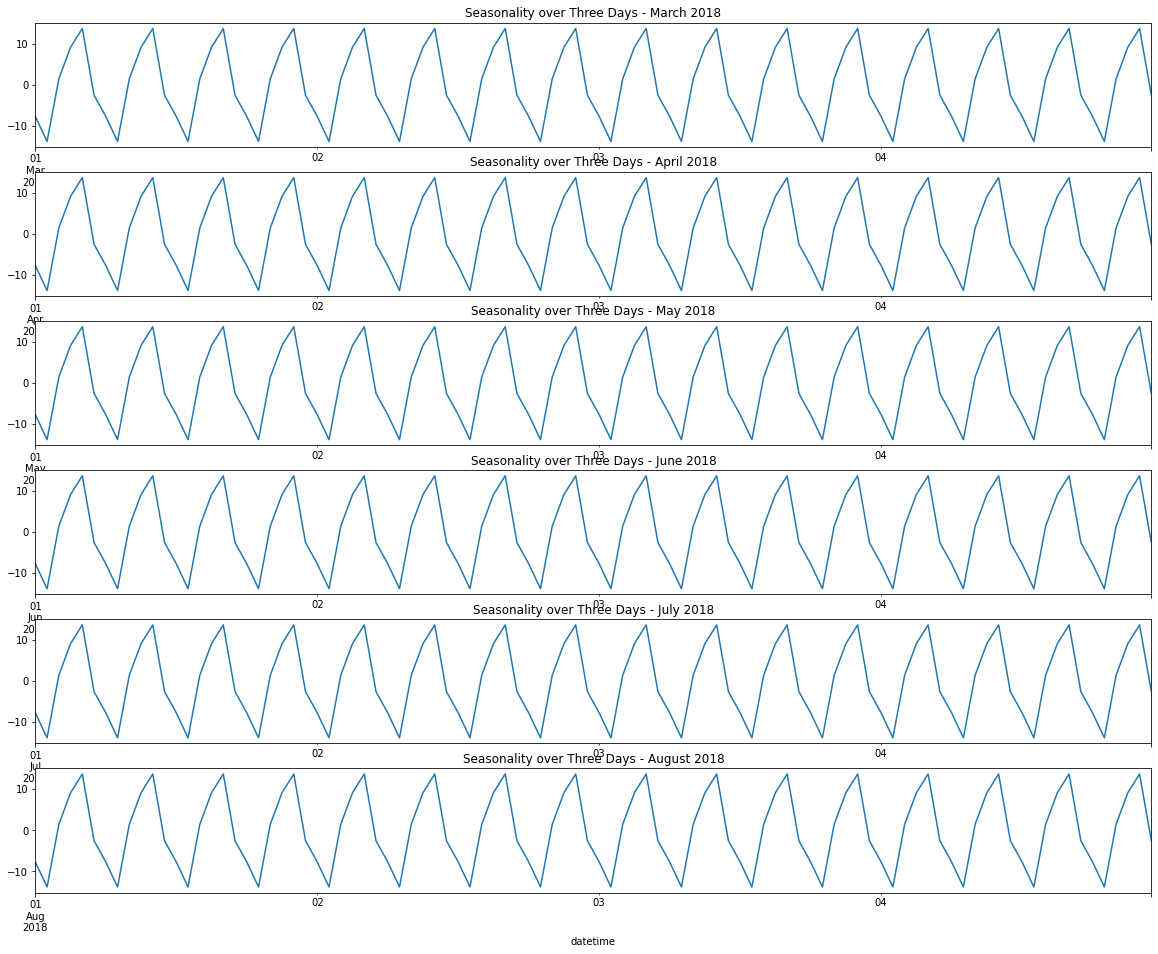

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed.seasonal['2018-03-01':'2018-03-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - March 2018')
plt.subplot(612)
decomposed.seasonal['2018-04-01':'2018-04-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - April 2018')
plt.subplot(613)
decomposed.seasonal['2018-05-01':'2018-05-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - May 2018')
plt.subplot(614)
decomposed.seasonal['2018-06-01':'2018-06-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - June 2018')
plt.subplot(615)
decomposed.seasonal['2018-07-01':'2018-07-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - July 2018')
plt.subplot(616)
decomposed.seasonal['2018-08-01':'2018-08-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

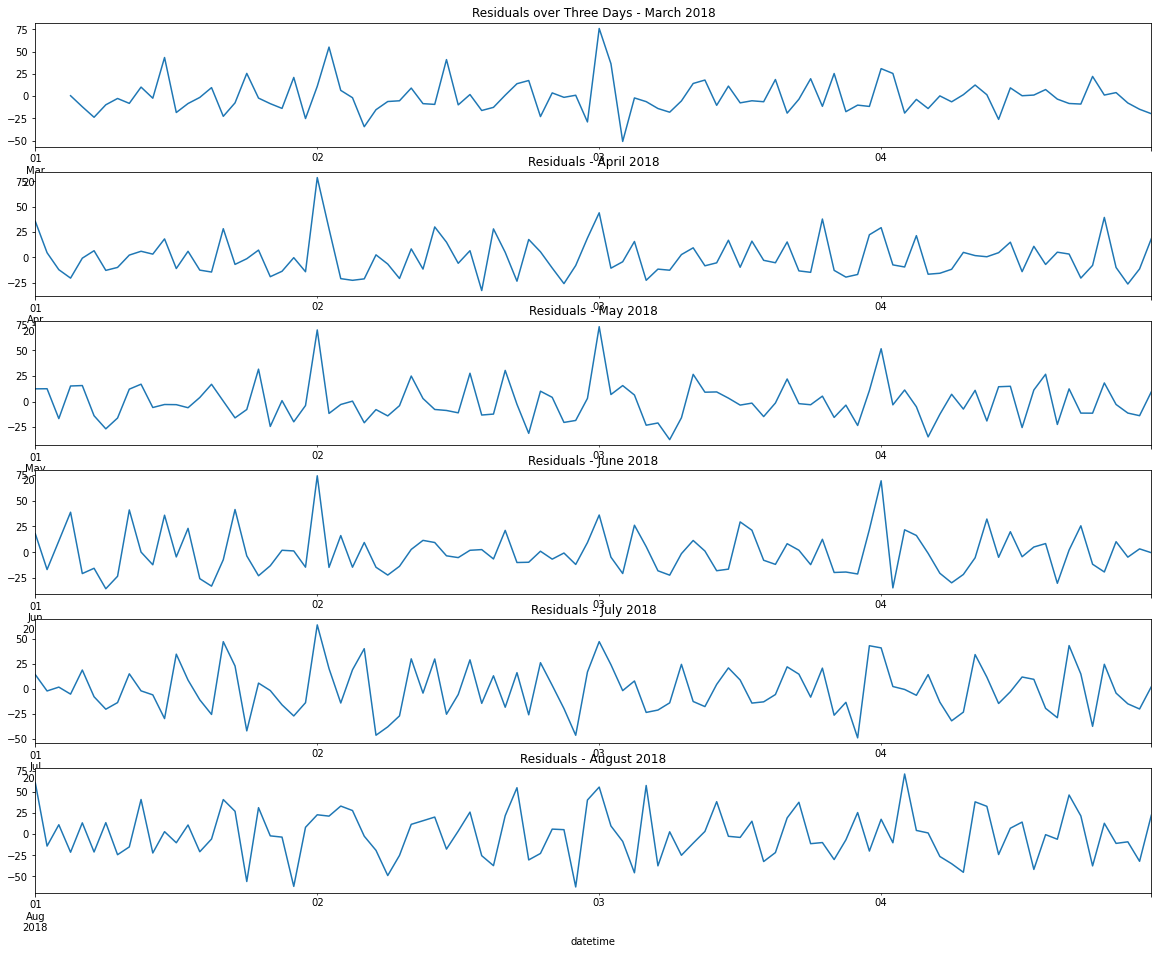

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed.resid['2018-03-01':'2018-03-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals over Three Days - March 2018')
plt.subplot(612)
decomposed.resid['2018-04-01':'2018-04-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - April 2018')
plt.subplot(613)
decomposed.resid['2018-05-01':'2018-05-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - May 2018')
plt.subplot(614)
decomposed.resid['2018-06-01':'2018-06-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - June 2018')
plt.subplot(615)
decomposed.resid['2018-07-01':'2018-07-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - July 2018')
plt.subplot(616)
decomposed.resid['2018-08-01':'2018-08-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>
    

        

Applying log1p to 'num_orders'.
</div>

In [69]:
# c) Automatic time series decomposition after appling log1p
decomposed2 = seasonal_decompose(np.log1p(data2['num_orders']), model='additive', period=6)

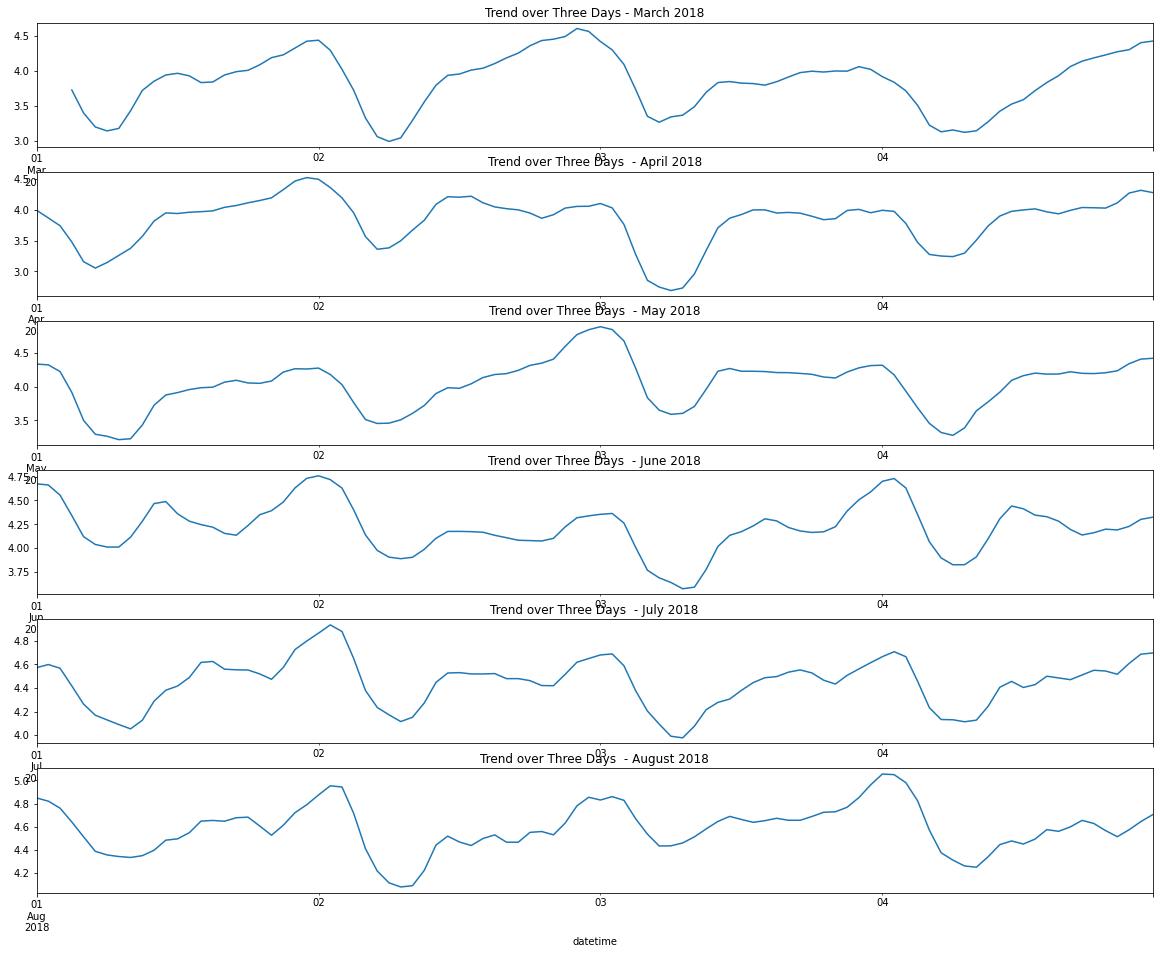

<Figure size 432x288 with 0 Axes>

In [70]:
# take a look at a period of three days in each month
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed2.trend['2018-03-01':'2018-03-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days - March 2018')
plt.subplot(612)
decomposed2.trend['2018-04-01':'2018-04-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - April 2018')
plt.subplot(613)
decomposed2.trend['2018-05-01':'2018-05-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - May 2018')
plt.subplot(614)
decomposed2.trend['2018-06-01':'2018-06-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - June 2018')
plt.subplot(615)
decomposed2.trend['2018-07-01':'2018-07-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - July 2018')
plt.subplot(616)
decomposed2.trend['2018-08-01':'2018-08-04'].plot(ax=plt.gca()) # residual
plt.title('Trend over Three Days  - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

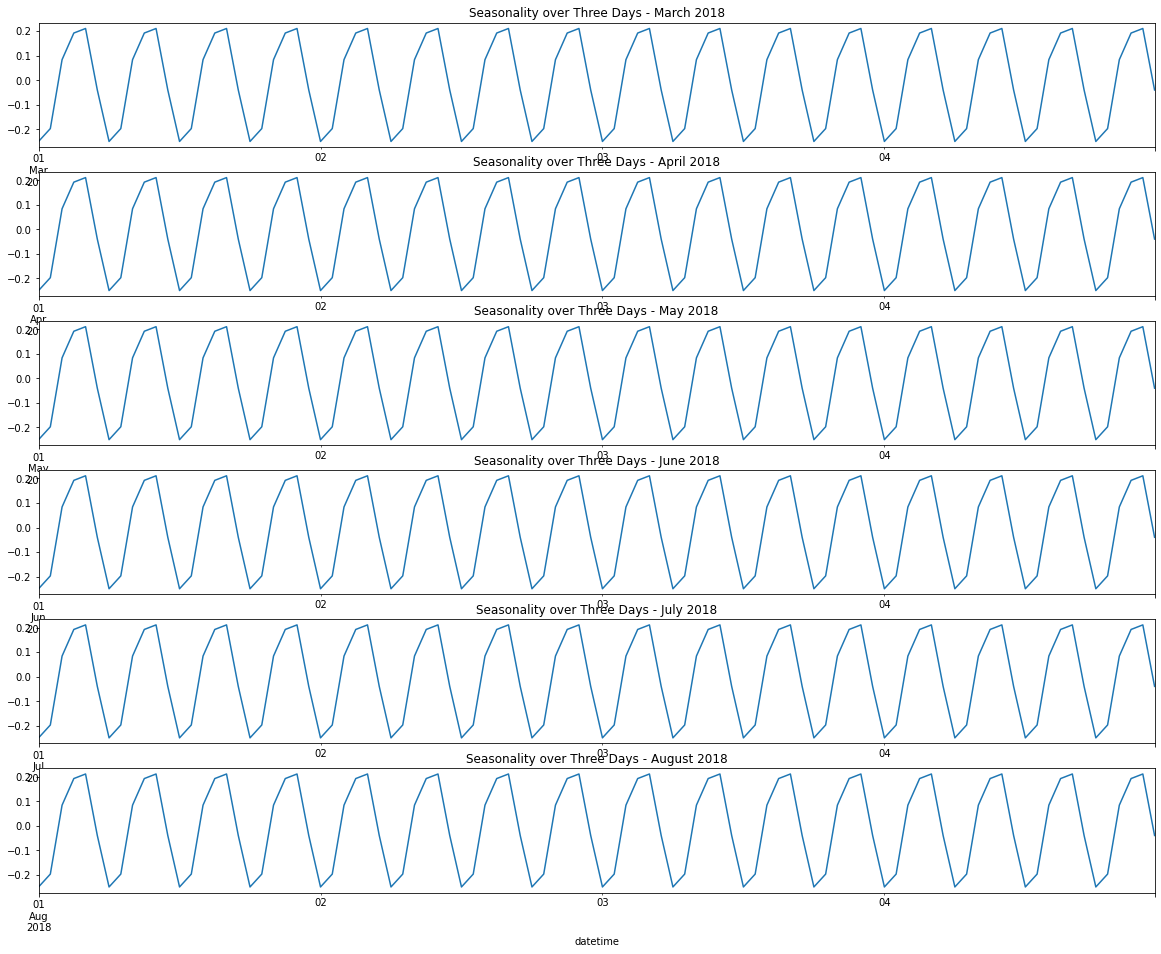

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed2.seasonal['2018-03-01':'2018-03-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - March 2018')
plt.subplot(612)
decomposed2.seasonal['2018-04-01':'2018-04-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - April 2018')
plt.subplot(613)
decomposed2.seasonal['2018-05-01':'2018-05-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - May 2018')
plt.subplot(614)
decomposed2.seasonal['2018-06-01':'2018-06-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - June 2018')
plt.subplot(615)
decomposed2.seasonal['2018-07-01':'2018-07-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - July 2018')
plt.subplot(616)
decomposed2.seasonal['2018-08-01':'2018-08-04'].plot(ax=plt.gca()) # seasonal
plt.title('Seasonality over Three Days - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

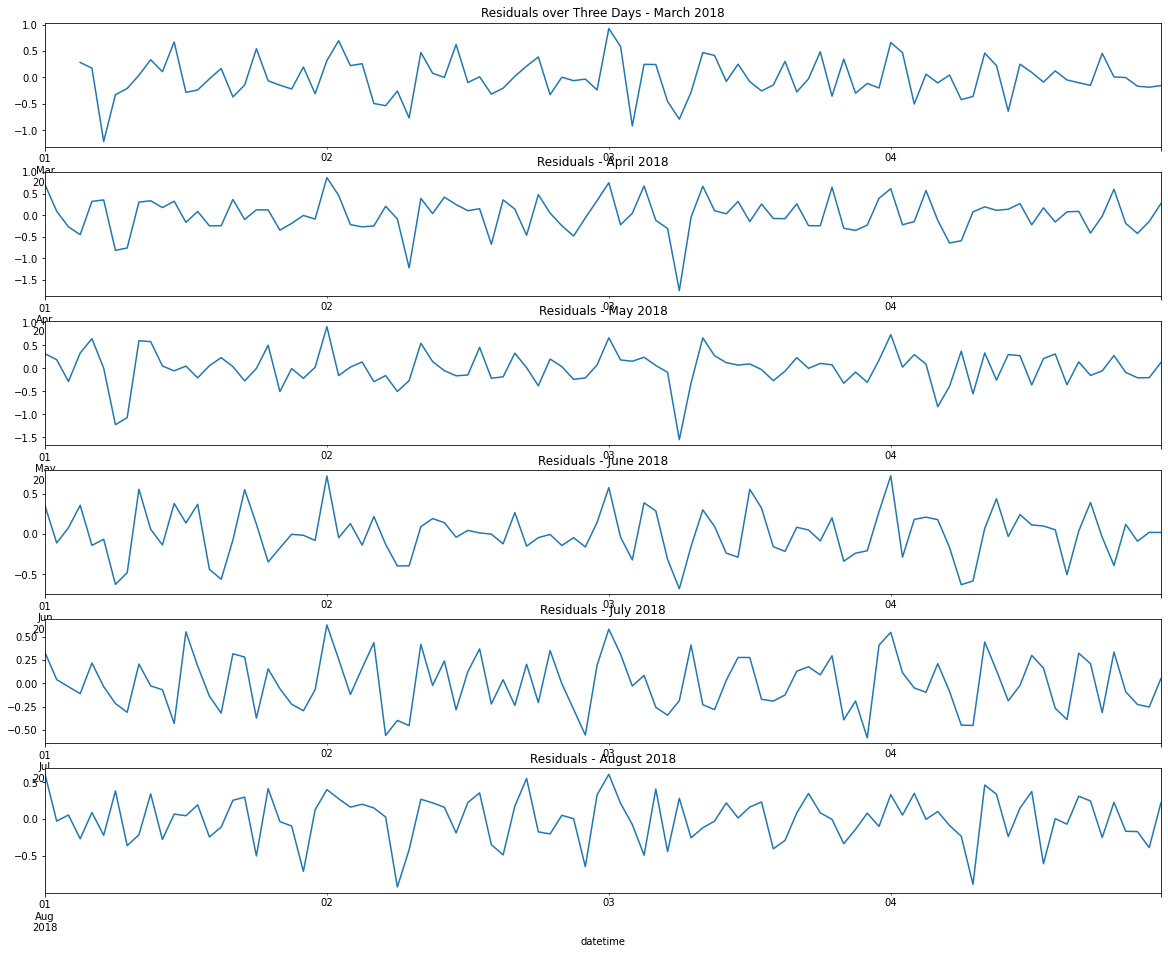

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize=(20, 16))
plt.subplot(611)
decomposed2.resid['2018-03-01':'2018-03-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals over Three Days - March 2018')
plt.subplot(612)
decomposed2.resid['2018-04-01':'2018-04-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - April 2018')
plt.subplot(613)
decomposed2.resid['2018-05-01':'2018-05-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - May 2018')
plt.subplot(614)
decomposed2.resid['2018-06-01':'2018-06-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - June 2018')
plt.subplot(615)
decomposed2.resid['2018-07-01':'2018-07-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - July 2018')
plt.subplot(616)
decomposed2.resid['2018-08-01':'2018-08-04'].plot(ax=plt.gca()) # residual
plt.title('Residuals - August 2018')
plt.show()
plt.tight_layout()    # this helps fit subplots into the area 

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>
    
When I transform the data by log1p, the patterns seem to get more pronounced.  

* Trend: we can see the peaks at midnight and 11 am more clearly. 
* Seasonality: still nothing to write home about. 
* Residual: the graph is more erratic and we cannot discern any pattern-looking thing any longer. 

This is the power of transformation!
</div>

We will use Augmented Dickey-Fuller (ADF or Unit Root Test) to find if the time series is stationary or not. 

* H0 (p-value > 0.05): "The time series is not stationary."
* H1 (p-value <= 0.05): "The time series is stationary."

The ADF test gives us the test statistics (the more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence) and a p-value.

If p-value > 0.05, fail to reject the null hypothesis. This means that time series has a unit root, is not stationary, and shows a systematic pattern that is unpredictable. 
<br>If p-value <= 0.05, then reject the null hypothesis. The data does not have a unit root and is stationary.

In [24]:
result = adfuller(data2['num_orders'], autolag='AIC')
print('p-value:', result[1])
print('Test Statistic:', result[0]) 
print('Number of lags used:', result[2])
print('Number of observations:', result[3])
print('Reject H0 (alpha=0.05):', result[1] < 0.05)

p-value: 0.028940051402613794
Test Statistic: -3.0689242890279447
Number of lags used: 30
Number of observations: 4385
Reject H0 (alpha=0.05): True


* We can reject the null hypothesis and state that the time series data is stationary.
* The time series is already stationary, and therefore, there is no need to make it stationary, for instance, by calculating the time series differences. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Ok, great!
	  
</div>

Usually trends and seasonality are linked to a specific date. We will create two new features out of the datatime feature to explicitly expose information contained in the datetime feature. 

1. Calendar features: the constituent components of the datetime, i.e. year, month, day, dayofweek 
2. Lag features: the previous values in the time series x(t-1) to tell us whether the function x(t) will grow or decrease

In [78]:
def make_features(data, col, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    for lag in range(1, max_lag+1):
        data['lag_{}'.format(lag)] = data[col].shift(lag)
        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Good, you added calendar features and lag features. One obvious omission is an 'hour' feature (we're doing hourly predictions after all!).
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
Oops, I have now added an 'hour' feature. 
   
        
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok, cool!
	  
</div>

In [79]:
# exclude 'rolling_std'
data3 = pd.DataFrame(data2['num_orders'])

In [80]:
column='num_orders'
make_features(data3, column, 30, 10)

In [81]:
data3.shape

(4416, 37)

Despite the ADF test confirming that 'num_orders' is stationary, we will try obtaining its first time differences and see if it is stationary even more. 

In [82]:
data3['first_diff'] = data3['num_orders'] - data3['lag_1']

In [83]:
data_temp = data3.copy()
data_temp = data_temp.dropna()

In [84]:
result2 = adfuller(data_temp['first_diff'], autolag='AIC')
print('p-value:', result2[1])
print('Test Statistic:', result2[0]) 
print('Number of lags used:', result2[2])
print('Number of observations:', result2[3])
print('Reject H0 (alpha=0.05):', result2[1] < 0.05)

p-value: 1.255001431593329e-28
Test Statistic: -15.74128047729495
Number of lags used: 31
Number of observations: 4354
Reject H0 (alpha=0.05): True


* Yes, the first differences are even more stationary. 

Draw a lag plot as a scatter plot of the time series against lags of itself and check for autocorrelation. 

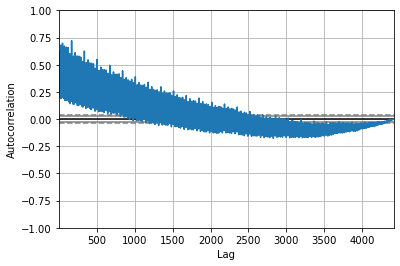

In [85]:
data_autocorrelate = data3['num_orders']
autocorrelation_plot(data_autocorrelate)
plt.show();

* The earlier the lag, the higher the autocorrelation.

This can be seen more clearly by plotting each lag separately.

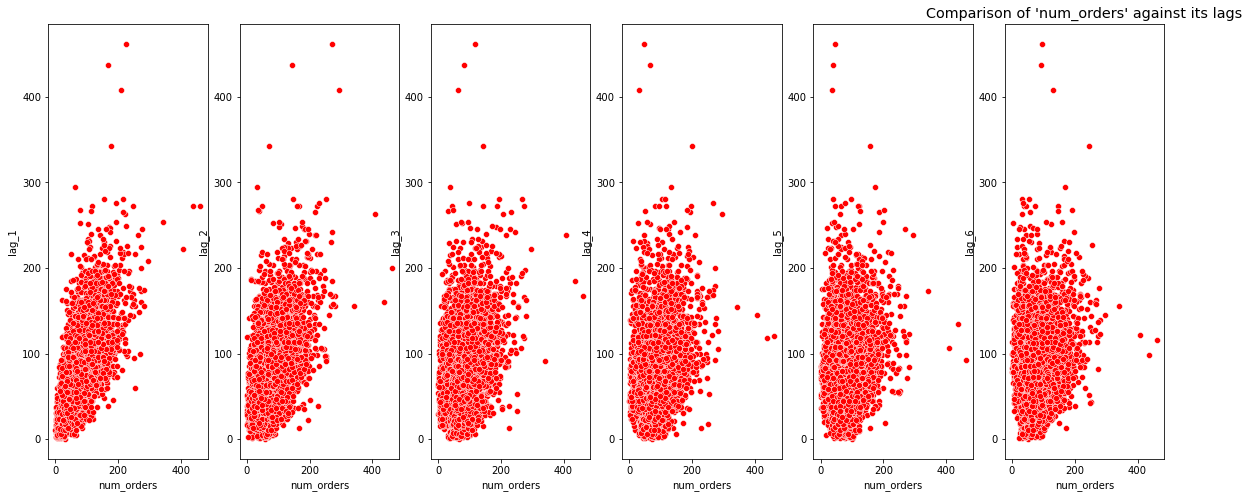

In [86]:
fig, ax = plt.subplots(1, 6, figsize=(20, 8))
plt.style.use('ggplot') # makes plot looks much nicer
sns.scatterplot(data=data3, x='num_orders', y='lag_1', ax=ax[0], color='r')
sns.scatterplot(data=data3, x='num_orders', y='lag_2', ax=ax[1], color='r')
sns.scatterplot(data=data3, x='num_orders', y='lag_3', ax=ax[2], color='r')
sns.scatterplot(data=data3, x='num_orders', y='lag_4', ax=ax[3], color='r')
sns.scatterplot(data=data3, x='num_orders', y='lag_5', ax=ax[4], color='r')
sns.scatterplot(data=data3, x='num_orders', y='lag_6', ax=ax[5], color='r')
plt.title("Comparison of 'num_orders' against its lags")
plt.show();

* There are no strikingly strong correlations between 'num_orders' and its lags that jump at us. 
* 'lag_6' seems slightly more dispersed than 'lag_1, indicating that whatever little correlation there maybe between the lag and 'num_orders', there is less of it as the number of lags progresses.  

In [87]:
# doubly make sure that the datetime index is properly sorted chronologically
#data3.sort_index(inplace=True)

# silence SettingWithCopyWarning that may arise from making a copy of the dataframe
#pd.options.mode.chained_assignment = None

# make a copy of the dataset with the required columns only
#data4 = data3[['num_orders', 'year', 'month', 'day', 'dayofweek']]

# deseasonalise by subtracting the seasonal element
#seasonal_element = decomposed.seasonal
#data4['num_orders'] = data4['num_orders'] - seasonal_element

# calculate the moving average
#data4['rolling_mean'] = data4['num_orders'].rolling(10).mean()

# calcualte six lags
#column='num_orders'
#make_features(data4, column, 6)

# calculate the first time differences
#data4['first_diff'] = data4['num_orders'] - data3['lag_1']

<div class="alert alert-danger">
<s.<b>Reviewer's comment</b>
	  
1. There is data leakage: the rolling mean is calculated using the target that we're trying to predict. The correct way to calculate rolling mean as a feature is to calculate it on the data shifted by one.
2. By subtracting the seasonal component from `num_orders` you're modifying both features and target, which makes it impossible to compare your models' performance with the `RMSE = 48` from the task description, which assumes that target is the total number of orders. So, if you'd like to do it like this, you should reconstruct the total number of orders from your predictions of differences/deseasonalized number of orders, etc. Also, I would be wary of trusting the seasonality component from `seasonal.decomposition` too much, [the docs](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) claim:
    
    > This is a naive decomposition. More sophisticated methods should be preferred.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
I have added the rolling mean by shifting by one.  
    
    
I have disabled my attempt to deseasonalise the dataset. The whole point of doing the Augmented Dickey-Fuller test was to confirm that the time series data had no seasonality in it and was therefore stationary. So I realised that my exercise was pointless.         
    
By the same token, I have removed the 'rolling_mean' feature from the dataset since the time series data is stationary and there are no fluctuations to reduce. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok then! Looks like you decided to add the rolling mean (but correctly shifted now) in the end though!
	  
</div>

Let us look at the partial autocorrelation plot to know which lags are more strongly correlated to the original feature. 

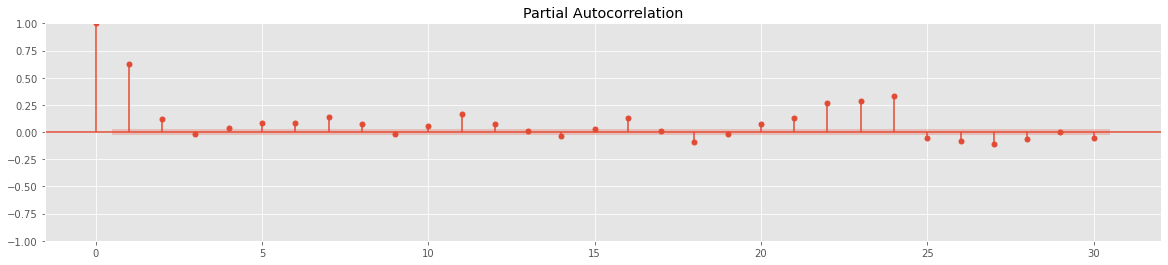

In [88]:
# prepare the data for the plot
autocorr = pd.DataFrame(data3['num_orders'], columns=['num_orders'])

# plot the partial autocorrelation
fig = plt.figure(figsize=(20, 4))
ax = fig.gca() # gca: get current axis
plot_pacf(autocorr, lags=30, ax=ax)
plt.title("Partial Autocorrelation")
plt.show();

* In relation to the ground truth (at 0), of all those lags above the red zone of significance, 1, 2, 7, 11, 16, 21, 22, 23, 24 and 27 show a promising correlation. 

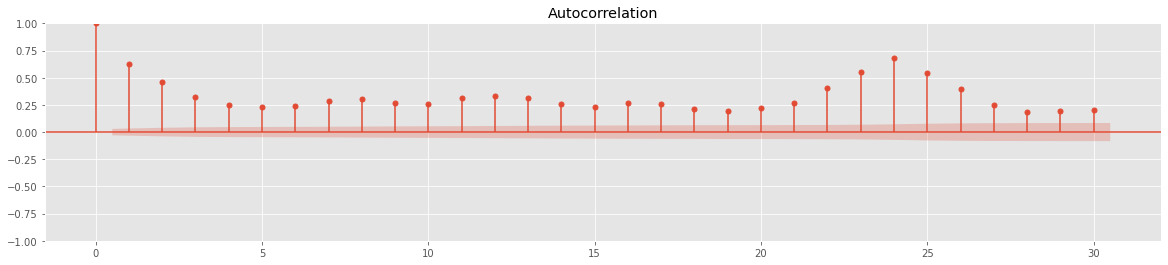

In [89]:
# plot the autocorrelation
fig = plt.figure(figsize=(20, 4))
ax = fig.gca()
plot_acf(autocorr, lags=30, ax=ax)
plt.title("Autocorrelation")
plt.show();

In relation to the ground truth (at 0), lag 24, followed by lag 1, show the highest correlation. 

## Training

Since:

* we are required to predict the amount of taxi orders for the next hour, and
* the values of the time series as well as the finction x(t) (where t=time) are numbers,

we will use a one-step horizon for the regression task. 

Let us split the dataset into training and test subdatasets. The project specification requires that the test dataset be 10% of the initial dataset.

The original dataset contained no missing values, but some rows came to contain a NaN value as a result of calculating lags and first time differences. Since they are very few in numbers, they will be dropped rather than trying to fill them. 

In [90]:
# doubly make sure that the datetime index is properly sorted chronologically
data3.sort_index(inplace=True)

# split the dataset at a ratio of 9:1
train, test = train_test_split(data3, shuffle=False, test_size=0.1) # no shuffling since this is a time series
train = train.dropna() # 4416-(3968+442)=4416-4410=6 rows lost

# verify the dataset was split correctly
print('training dataset time range:', train.index.min(), train.index.max())
print('test dataset time range:', test.index.min(), test.index.max())
print('training dataset shape:', train.shape) 
print('test dataset shape:', test.shape) 

training dataset time range: 2018-03-02 06:00:00 2018-08-13 13:00:00
test dataset time range: 2018-08-13 14:00:00 2018-08-31 23:00:00
training dataset shape: (3944, 38)
test dataset shape: (442, 38)


In [153]:
# split the dataset into training and test subdatasets
X_train = train.drop(['num_orders', 'first_diff', 'rolling_mean', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_8', 'lag_9', 'lag_10', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_25', 'lag_26', 'lag_28', 'lag_29', 'lag_30'], axis=1) 
y_train = train['num_orders']
X_test = test.drop(['num_orders', 'first_diff', 'rolling_mean', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_8', 'lag_9', 'lag_10', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_25', 'lag_26', 'lag_28', 'lag_29', 'lag_30'], axis=1)
y_test = test['num_orders']

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, the data is split into train and test without shuffling
	  
</div>

The time range of the data in the training dataset correctly precede that of the data in the test dataset. So the model will not be in a situation where it will be trained on some "future data" and then tested on some "past data" - there is no data leakage. 


We will be training a model with a forecast horizon of one day. Let us specify two performance baselines as a sanity check using dataset (A):

a) constant model: all values of the test sample are predicted with the median (a constant)
<br>b) use the previous value in the time series: the new value x(t) is predicted by the previous value in the series x(t-1)


We will measure the accuracy of time series forecasting using the RMSE metric. 

In [92]:
# a) constant model
pred_median = np.ones(test.shape[0]) * y_train.median() 
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_median))) 

RMSE: 87.15277582981295


In [93]:
# b) use the previous value in the time series
pred_previous = y_test.shift(fill_value=int(y_train.iloc[-1]))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_previous))) 

RMSE: 58.856486242815066


* The models are expected to score at least these. The project threshold is 48. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Ok, using previous value is often a reasonable baseline! As we can see, it easily beats the constant model
    
	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
The baseline is only valid for the data that was not deseasonalized.
    
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
Yes, I understand. I have removed the dataset which I attempted to deseasonalise, so I will not be adding any more  baseline checks. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok!
	  
</div>

**Linear Regression**

Plot the model performance on the training and validation datasets during cross validation. 

In [41]:
# an initial run
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
print('RMSE for training:', np.sqrt(mean_squared_error(y_train, y_pred_train))) 

RMSE for training: 26.075882882928248


* The model is above the baseline and does not satisfy the project threshold. 


Look at the learning curve while running cross validation. 

In [122]:
# specify the split carefully since this is time series data
n_splits = 10
tscv = TimeSeriesSplit(n_splits)

In [123]:
model_not_deseasoned = LinearRegression()
train_sizes, train_scores, valid_scores = learning_curve(model_not_deseasoned, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error') 

In [124]:
train_sizes
rmse_train = np.sqrt(np.abs(train_scores))
rmse_valid = np.sqrt(np.abs(valid_scores))

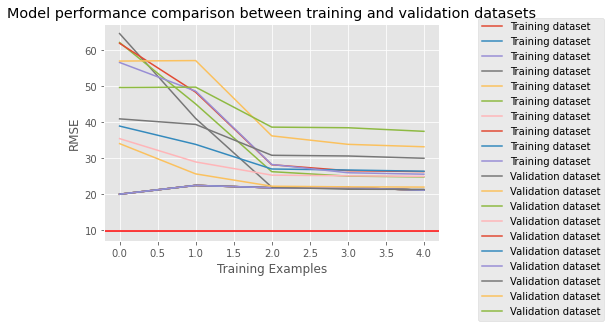

In [125]:
# plot the RMSE scores of the model's performance on the training dataset and on the validation dataset
plt.plot(rmse_train, label='Training dataset')
plt.plot(rmse_valid, label='Validation dataset')
plt.axhline(y=9.68, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("RMSE")
plt.xlabel("Training Examples")
plt.show();

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Not sure what the point of this plot is
	  
</div>

In [46]:
print('mean RMSE for training:', np.mean(rmse_train))
print('mean RMSE for validation:', np.mean(rmse_valid))

mean RMSE for training: 21.399823863641817
mean RMSE for validation: 34.99782453943347


* The RMSE score is lower than the baseline and the project threshold. 

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>
    
I saw that there was a rather big discrepancy in the model's performance between the training and validation datasets which I was not happy to see. I remembered your advice from a couple of projects to compare the model's performance using a learning curve, so I wanted to try it out...
    
    
<br>I do not think the model is overfit here. Am I correct?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Oh, okay, I got it now! Sorry, I just didn't get at first what the 'training examples' label on the x axis meant. Yeah, it seems that the model is a bit overfit, maybe some regularization would help, but in any case, your validation/test score is pretty good!
	  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
The RMSE that low is a huge indicator that something went wrong. So I would suggest double checking everything looking for data leakage when something like this happens.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment</b>
    
I found the culprit - 'first_diff' was making havoc. Once I removed it from the training and test datasets, the RMSE scores started looking normal. 
    
'first_diff' is calculated from 'num_orders' and 'lag_1'. So that caused a kind of duplication of features? Is this multicollinearity?
    
An instructor said that 'first_diff' usually helps improve a model's performance, and I told him that it in fact had an opposite and negative effect on my model and that I wanted to know why. He basically summarised that if I experiment and find out what works for my model, that is what is important. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Huh, if `first_diff` is calculated using `num_orders` and `lag_1`, that's definitely data leakage (i.e. you can just caclulate target `num_order` from `first_diff` and `lag_1`, no models needed), so I'm really not sure why it would have a negative effect. Maybe you should try calculating as `lag_1 - lag_2` instead? Anyway, experimenting and finding out what works is definitely the way to go!
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>
    
I want to look into the "claims" that first time differences help crack time series problems. I have not yet found convincing materials. Could you recommend some that I could read? 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>
	  
Well, differencing helps to make the data more stationary, see for example [wiki page on ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average#Differencing). If you want something deeper, you would probably be best off consulting some textbook on time series analysis, but I'm not really familiar with the literature on this topic, so can't make a good recommendation, sorry!
	  
</div>

Let us try and see if we can improve the model's performance. Do cross validation and hyperparameter tuning. 

In [47]:
def objective(trial, X_df, y_df):
    
    lr__fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
   
    params = {
        'fit_intercept': lr__fit_intercept
    }

    lr_model = LinearRegression(**params)
    scores = cross_val_score(lr_model, X_df, y_df, cv=tscv, scoring='neg_mean_squared_error') 
    return np.nanmean(np.sqrt(np.abs(scores)))

In [48]:
study = optuna.create_study(direction="minimize", study_name="Linear Regression")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=3)

[I 2021-11-26 20:01:41,184] A new study created in memory with name: Linear Regression
[I 2021-11-26 20:01:41,269] Trial 0 finished with value: 26.645353478071673 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 26.645353478071673.
[I 2021-11-26 20:01:41,447] Trial 1 finished with value: 26.645353471418872 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 26.645353471418872.
[I 2021-11-26 20:01:41,520] Trial 2 finished with value: 26.645353471418872 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 26.645353471418872.


* 'fit_intercept' does not seem to affect the performance at all. 

**AutoRegressive Integrated Moving Average (ARIMA)**


We will perform Univariate Time Series Forecasting using the previous values of the time series to predict its future values.

* 'p' is the order of the Auto Regressive (AR) term, which refers to the number of lags of Y to be used as predictors. In our case, this is 6.
* 'd' is the degree of differencing. In our case, this is 1. 
* 'q' is the order of the Moving Average (MA) term. In our case, this is 10. 

Since the ARIMA model requires a univariate `endog` dataset, we will put 'num_orders' in the training and test datasets. 

In [94]:
# an initial run
data_arima = data3[['num_orders']]
data_arima.sort_index(inplace=True)
train_arima, test_arima = train_test_split(data_arima, shuffle=False, test_size=0.1) # no shuffling since this is a time series

In [127]:
# split 'train_arima' to training and validation subdatasets
train_arima, valid_arima = train_test_split(train_arima, shuffle=False, test_size=0.1)

In [128]:
# verify the dataset was split correctly
print('training dataset time range:', train_arima.index.min(), train_arima.index.max())
print('validation dataset time range:', valid_arima.index.min(), valid_arima.index.max())
print('test dataset time range:', test_arima.index.min(), test_arima.index.max())
print('training dataset shape:', train_arima.shape) 
print('validation dataset shape:', valid_arima.shape) 
print('test dataset shape:', test_arima.shape) 

training dataset time range: 2018-03-01 00:00:00 2018-07-27 23:00:00
validation dataset time range: 2018-07-28 00:00:00 2018-08-13 13:00:00
test dataset time range: 2018-08-13 14:00:00 2018-08-31 23:00:00
training dataset shape: (3576, 1)
validation dataset shape: (398, 1)
test dataset shape: (442, 1)


In [129]:
# create and define an instance of the ARIMA model
arima_not_deseasoned = ARIMA(endog=train_arima['num_orders'], order=(24, 1, 25)) # better than (1, 1, 24)

# fit the model
arima_model_fit = arima_not_deseasoned.fit()

C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
# summary of the fit model
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                 3576
Model:               ARIMA(24, 1, 25)   Log Likelihood              -16028.954
Date:                Wed, 01 Dec 2021   AIC                          32157.907
Time:                        16:56:20   BIC                          32466.994
Sample:                    03-01-2018   HQIC                         32268.098
                         - 07-27-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3010      0.037     -8.056      0.000      -0.374      -0.228
ar.L2         -0.2628      0.042     -6.281      0.000      -0.345      -0.181
ar.L3         -0.0597      0.044     -1.347      0.1

* The significance level, alpha, is set to 0.05, and the p-value is 0.000 for all size lags. Moving average was not factored into the equation for it raised the RMSE for the worse. Despite what we saw earlier in the lag plots, there seems to be a statistically significant association between the lags and 'num_orders'. 


The best fit model is selected based on Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values. 


Let us plot the residuals to ensure there are no more patterns that were not captured by the model - look for constant mean and variance.

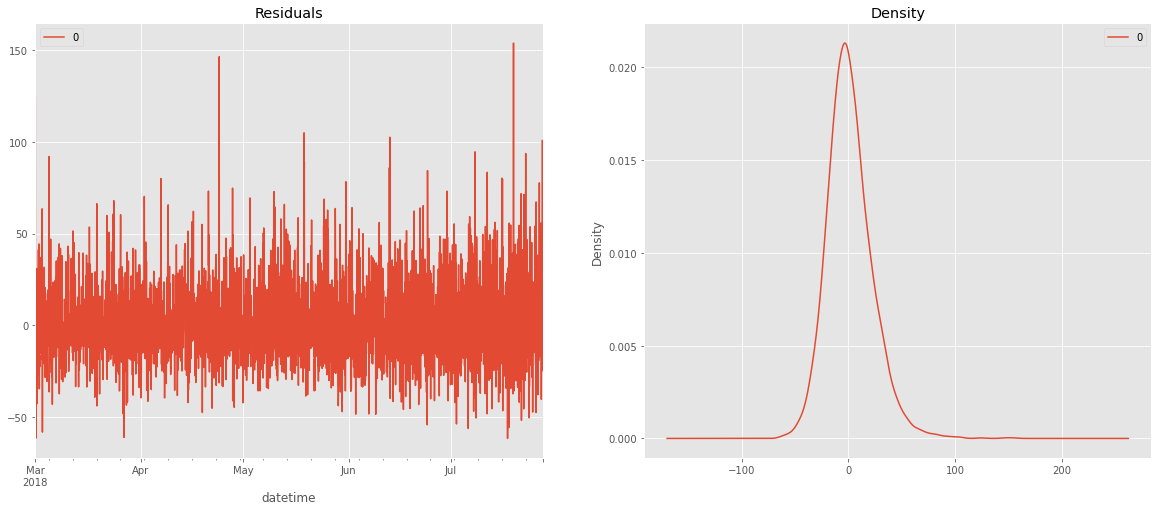

In [131]:
# line plot of residuals
residuals = pd.DataFrame(arima_model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(20, 8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show();

In [132]:
# summary stats of residuals
print(residuals.describe())

                 0
count  3576.000000
mean      1.428052
std      21.417411
min     -61.765088
25%     -12.356145
50%      -0.785209
75%      13.252800
max     153.877635


* The mean is above zero, so there is little bias in the prediction. 

In [133]:
# check the RMSE score on the training dataset
predictions = arima_model_fit.predict()

# evaluate forecasts on the training dataset
rmse_arima_train = np.sqrt(mean_squared_error(train_arima['num_orders'], predictions))
print('ARIMA model RMSE on training dataset:', rmse_arima_train)

ARIMA model RMSE on training dataset: 21.46197917785093


<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>
    
I have split the training dataset to training and validation subdatasets. I evaluated the model on the validation dataset as below. 
</div>

In [136]:
# the training dataset ends at 2018-07-27 23:00:00
# the validation dataset starts at 2018-07-28 00:00:00 and ends at 2018-08-13 13:00:00
start_index = '2018-07-28 00:00:00'
end_index = '2018-08-13 13:00:00'
forecast_valid = arima_model_fit.predict(start=start_index, end=end_index)

In [137]:
# evaluate forecasts on the validation dataset
rmse_arima_valid = np.sqrt(mean_squared_error(valid_arima['num_orders'], forecast_valid))
print('ARIMA model RMSE on validation dataset:', rmse_arima_valid)

ARIMA model RMSE on validation dataset: 33.65612418016733


Let us try and see if we can improve the model performance. Do cross validation and hyperparameter tuning. 

In [56]:
'''
def find_best_order(X_df, p_options, d_options, q_options):
    best_rmse, best_order = float("inf"), None
    for p in p_options:
        for d in d_values:
            for q in q_values:
                arima_order = (p, d, q)
                arima_model = ARIMA(endog=X_df, order=arima_order)
                arima_model_fit = arima_model.fit()
                predictions = arima_model_fit.predict()
                rmse = np.sqrt(mean_squared_error(X_df, predictions))
                if rmse < best_rmse:
                    best_rmse, best_order = rmse, arima_order
                    print('ARIMA%s RMSE=%.3f' % (arima_order, rmse))
    return best_rmse, best_order 
'''    

In [88]:
'''
import math

p_values = [1, 24] # range(1, 11)
d_values = [0, 1] # range(0, 2)
q_values = [1, 23, 24, 25] #range(1, 11)

#for i in tqdm(range(2 * 2 * 4)):
find_best_order(train_arima, p_values, d_values, q_values)
'''

ARIMA(1, 0, 1) RMSE=31.792


C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA(1, 0, 23) RMSE=29.291


C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA(1, 0, 24) RMSE=28.064
ARIMA(1, 0, 25) RMSE=28.037


C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA(1, 1, 25) RMSE=27.712
ARIMA(24, 0, 1) RMSE=25.944


C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA(24, 0, 23) RMSE=23.438


C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA(24, 0, 24) RMSE=22.791


C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
C:\Users\renab\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA(24, 1, 25) RMSE=22.405


(22.405364485133, (24, 1, 25))

* Using the AR and MA values gotten from the ACF and PACF produce a better result than the hyperparameter tuning. 

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

In Optuna, I could not find a way to pass (p, d, q) as a tuple "arima_order" to the line:
    
```
arima_model = ARIMA(endog=X_df, order=arima_order)
```
    
so I tried writing a custom code. It took a very long time for loops to finish running, but it did give me a better RMSE on the test dataset. 
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
So, if I understand correctly, you are actually tuning the model based on the train set scores, which probably leads to overfitting to the train set, and doubling of the error on the test set you noted at the end of the notebook
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

Of course - so I should have split 'train_arima' dataset into training and validation subdatasets and use the latter to find the best (p, d, q). The code I wrote takes way too long and is not feasible. 
    

In Optuna, I could not find a way to pass (p, d, q) as a tuple "arima_order" to the line:    
```
arima_model = ARIMA(endog=X_df, order=arima_order)
```
    
Could you point me to a good reference for this syntax?
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>
	  
Sorry, not sure what you mean exactly: you could use `trial.suggest_int` to generate the p, d, q values in optuna and then construct a tuple `(p, d, q)` and pass it as `order` parameter to ARIMA constructor, with pretty much the same syntax as you used for you own function
	  
</div>

Trying out auto_arima to find the optimal values for (p, d, q).

In [73]:
!pip install pmdarima

  Using cached pmdarima-1.8.4-cp38-cp38-win_amd64.whl (600 kB)


In [75]:
from pmdarima.arima import auto_arima

In [138]:
auto_arima_model = auto_arima(train_arima, start_p=0, start_q=0, 
                              test='adf', # use adftest to find optimal 'd'
                              max_p=25, max_q=25, # maximum p and q
                              m=24, # frequency of series
                              d=None,
                              seasonal=True, # seasonality
                              start_P=0, 
                              D=0, 
                              trace=True, 
                              error_action='warn', # 'ignore'
                              supress_warnings=True, 
                              stepwise=True
                             )
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=34852.118, Time=4.12 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=35779.380, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=33500.596, Time=13.13 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=34273.741, Time=8.23 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=41748.626, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=34573.688, Time=0.25 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=48.22 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=24.97 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=34003.183, Time=9.00 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=81.93 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=33921.529, Time=7.14 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=33388.292, Time=15.25 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=34534.613, Time=0.41 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=63.93 sec
 ARIMA(2,0,0)(1,0,1)[24

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 3576
Model:             SARIMAX(2, 0, 0)x(1, 0, [1, 2], 24)   Log Likelihood              -16100.235
Date:                                 Wed, 01 Dec 2021   AIC                          32214.470
Time:                                         17:22:31   BIC                          32257.744
Sample:                                              0   HQIC                         32229.897
                                                - 3576                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2950      0.283      8.102      0.000       1.740       2.850
ar.L1          0.1654      0.014     11.585      0.000       0.137       0.193
ar.L2          0.1713      0.014     11.966      0.000       0.143       0.199
ar.S.L24       0.9505      0.005    173.043      0.000       0.940       0.961
ma.S.L24      -0.8557      0.017    -49.508      0.000      -0.890      -0.822
ma.S.L48       0.1026      0.016      6.527      0.000       0.072       0.133
sigma2       449.7468      7.803     57.636      0.000     434.453     465.041
===================================================================================
Ljung-Box (L1) (Q):                   4.09   Jarque-Bera (JB):              1386.25
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Two sets of (p, d, q) are being suggested. Compare their performance. 

In [140]:
# order=(2, 0, 0)
auto_arima_model1 = ARIMA(endog=train_arima['num_orders'], order=(2, 0, 0))
auto_arima_model1_fit = auto_arima_model1.fit()
preds1 = auto_arima_model1_fit.predict()

In [141]:
# evaluate predictions on the training dataset
rmse_auto_arima_train1 = np.sqrt(mean_squared_error(train_arima['num_orders'], preds1))
print('ARIMA model1 RMSE on training dataset:', rmse_auto_arima_train1)

ARIMA model1 RMSE on training dataset: 30.22495345155678


In [143]:
# evaluate forecasts on the validation dataset
# the training dataset ends at 2018-07-27 23:00:00
# the validation dataset starts at 2018-07-28 00:00:00 and ends at 2018-08-13 13:00:00
start_index = '2018-07-28 00:00:00'
end_index = '2018-08-13 13:00:00'
forecasts_valid1 = auto_arima_model1_fit.predict(start=start_index, end=end_index)

In [144]:
# evaluate forecasts on the validation dataset
rmse_arima_valid1 = np.sqrt(mean_squared_error(valid_arima['num_orders'], forecasts_valid1))
print('ARIMA model1 RMSE on validation dataset:', rmse_arima_valid1)

ARIMA model1 RMSE on validation dataset: 58.102721355773774


In [145]:
# order=(2, 0, 1)
auto_arima_model2 = ARIMA(endog=train_arima['num_orders'], order=(1, 0, 2))
auto_arima_model2_fit = auto_arima_model2.fit()
preds2 = auto_arima_model2_fit.predict()

In [146]:
# evaluate predictions on the training dataset
rmse_auto_arima_train2 = np.sqrt(mean_squared_error(train_arima['num_orders'], preds2))
print('ARIMA model2 RMSE on training dataset:', rmse_auto_arima_train2)

ARIMA model2 RMSE on training dataset: 30.21083650891482


In [147]:
# evaluate forecasts on the validation dataset
# the training dataset ends at 2018-07-27 23:00:00
# the validation dataset starts at 2018-07-28 00:00:00 and ends at 2018-08-13 13:00:00
start_index = '2018-07-28 00:00:00'
end_index = '2018-08-13 13:00:00'
forecasts_valid2 = auto_arima_model2_fit.predict(start=start_index, end=end_index)

In [148]:
# evaluate forecasts on the validation dataset
rmse_arima_valid2 = np.sqrt(mean_squared_error(valid_arima['num_orders'], forecasts_valid2))
print('ARIMA model2 RMSE on validation dataset:', rmse_arima_valid2)

ARIMA model2 RMSE on validation dataset: 58.14604434808563


* It is much faster to run auto_arima but it did not bring much different result. auto_arima_model1_fit is slightly better.

**Error Trend Seasonality (ETS)**

It is common practice to use an optimization process to find the model hyperparameters that result in the exponential smoothing model with the best performance for a given time series dataset. 

We will use Triple Exponential Smoothing, or Holt-Winters Exponential Smoothing, with support for both trends and seasonality. We are again dealing with a univariate time series forecasting problem.

In [58]:
# create an instance of the model
t = 'additive'
ets_model = ExponentialSmoothing(train_arima, trend=t) # damped=d, seasonal=s, seasonal_periods=p

In [59]:
# fit the model
ets_model_fit = ets_model.fit(optimized=True) # use_boxcox=b, remove_bias=r

<div class="alert alert-info" role="alert">
<b>Comment</b>

I could not set the 'use_boxcox' hyperparameter to True because all the data have to be "strictly positive", and there is one 'num_orders' that is 0 at '2018-04-06 06:00:00'. 
    
![use_boxcox hyperparameter](use_boxcox.PNG "Cannot use the hyperparameter")
    
0 here is a legitimate observation, is not the result of deseasonalisation, cannot be modified to some other value, or deleted since this is a time series. 
    

<br>Is there anything I can do to the zero value that will enable me to set 'use_boxcox' hyperparameter to True?
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
You can try adding a positive constant to all `num_orders`, but I'm not sure if that would be a good idea.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

As you write, I don't feel it is right to alter the values of 'num_orders' that way...
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Well, ultimately, I think there's not much harm in doing that: if that's a constant value, we can just subtract it from the predictions afterwards; in any case, it's best to check with an experiment if some transformation works
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

I see that there are more and more layers to preparing time series data...I will keep it in mind and if/when I come across another time series project, I will try it out...
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Sure!
	  
</div>

In [60]:
# make a one-step forecast; specify the number of forecast wanted
forecast_ets = ets_model_fit.predict(0, len(train_arima)-1)

# evaluate forecasts on the training dataset
rmse_ets_train = np.sqrt(mean_squared_error(train_arima, forecast_ets))
print('ETS model RMSE on training dataset:', rmse_ets_train)

ETS model RMSE on training dataset: 34.035905275929984


**Prophet**

In [82]:
import sys
print(sys. version) # run conda install -c anaconda python=3.7

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


<div class="alert alert-info" role="alert">
<b>Comment</b>

It was a nightmare to install and set up the prophet work environment. This is the only instruction that worked: https://stackoverflow.com/questions/53178281/installing-fbprophet-python-on-windows-10
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
It was not required by the project :) By the way, if you're using windows 10 or 11, there's [Windows Subsystem for Linux](https://docs.microsoft.com/en-us/windows/wsl/about), which works pretty much like linux inside windows, and it's much easier to install things there.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

Sadly, my environment stopped working. After a few days of trying to rebuild the environment, I could not make it work, so I commented out all the code below. I will continue to try in my own time. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Well, that's unfortunate :(
	  
</div>

In [ ]:
'''
# prepare the dataframe for Prophet using dataset (A)
data_arima.head()
data_prophet = data_arima.copy()
data_prophet.reset_index(inplace=True)
data_prophet.rename(columns={'datetime':'ds', 'num_orders':'y'}, inplace=True)
'''

In [ ]:
#data_prophet.sort_index(inplace=True)
#train_prophet, test_prophet = train_test_split(data_prophet, shuffle=False, test_size=0.1) # no shuffling since this is a time series

In [ ]:
'''
#data_prophet.shape # (4416, 2)
#train_prophet.shape # (3974, 2) from 2018-03-01 00:00:00 until 2018-08-13 13:00:00
test_prophet.shape # (442, 2) from 2018-08-13 14:00:00 until 2018-08-31 23:00:00
'''

In [ ]:
#test_prophet.tail()

In [ ]:
# an initial run
# instantiate
#m = Prophet()

In [ ]:
#m.fit(train_prophet)

In [ ]:
'''
# prepare the prediction period until the last date in the test dataset (2018-08-31 23:00:00)
future = m.make_future_dataframe(periods=442, freq='H')
'''

In [ ]:
'''
#future.head()
future.tail()
'''

In [ ]:
'''
# generate the predictions
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
'''

In [ ]:
'''
#forecast.head()
forecast.tail()
'''

Check the model performance.

In [ ]:
'''
# extract 'yhat' for 2018-03-01 00:00:00 until 2018-08-13 13:00:00 and compare to train_prophet['ds']
forecast_prophet_train = forecast.query('ds >= "2018-03-01 00:00:00" & ds <= "2018-08-13 13:00:00"')['yhat']

# evaluate forecasts on the training dataset
rmse_prophet_train = np.sqrt(mean_squared_error(train_prophet['y'], forecast_prophet_train))
print('Prophet model RMSE on training dataset:', rmse_prophet_train)
'''

In [ ]:
'''
# extract 'yhat' for 2018-08-13 14:00:00 until 2018-08-31 23:00:00 and compare to test_prophet['ds']
forecast_prophet_test = forecast.query('ds >= "2018-08-13 14:00:00" & ds <= "2018-08-31 23:00:00"')['yhat']

# evaluate forecasts on the training dataset
rmse_prophet_test = np.sqrt(mean_squared_error(test_prophet['y'], forecast_prophet_test))
print('Prophet model RMSE on test dataset:', rmse_prophet_test)
'''

* Prior to cross validation, this is the kind of RMSE score we can expect from the model. 

Cross validation and model performance evaluation

We will run a 5-fold cross validation where the folds are defined as follows:
* Fold 1: 2966 hours of training data > 168 hours of predictions > 168 hours of assessment
* Fold 2: 3134 hours of training data > 168 hours of predictions > 168 hours of assessment
* Fold 3: 3302 hours of training data > 168 hours of predictions > 168 hours of assessment
* Fold 4: 3470 hours of training data > 168 hours of predictions > 168 hours of assessment
* Fold 5: 3638 hours of training data > 168 hours of predictions > 168 hours of assessment

In [ ]:
'''
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
'''

In [ ]:
'''
# run a 5-fold cross validation
df_cv = cross_validation(m,
                         initial = '2966 hours', # start with 3134 hours of training data in the first cutoff
                         period = '168 hours', # make predictions every week
                         horizon = '168 hours') # make predictions for the subsequent week
'''

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
If I understand correctly, in cross-validation of the prophet model you're making predictions for the next 168 hours, but in this project we're only trying to make predictions for the *next* hour every hour, not make predictions for 168 hours into the future; so it might be at a disadvantage when evaluated like this, but I'm not an expert in fbprophet.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

I went for the 168 hours because the test dataset contains 7 days' worth of rows in it (= 24*7; 10% of the original dataset). I had interpreted "make predictions for the next hour" to mean "on the granularity of hours" when the original dataset was presented on the granularity of 10 minutes. 
    
<br>So do you mean that in order to check the model performance, I should take out the data from the test dataset one row at a time and feed it to the model to get the next hour's prediction and do that 168 times? I did not do that for the Linear Regression model either - I fed the entire test dataset to the model to evaluate the RMSE score. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Yeah, well, for linear regression, you made lag features, so when it's making a prediction for time T, it has access to the true values for times T-1, T-2, ..., T-k in the form of lag features. But when you're making predictions with prophet and ARIMA, you're only giving the model the train set. So what does it do? Internally, it makes the predictions for the next hour 168 times, but for each next prediction the error increases, because it uses previously predicted values as lag features for new predictions. So, to make the conditions the same for ARIMA and prophet, you would really have to make a loop and do the predictions one hour at a time, adding the true values to the train set, and refitting the model. Please check out [this article](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/), section 'Rolling Forecast ARIMA Model' for a clear example.
    
Ultimately, ARIMA is pretty much the same as 'Linear regression with lag features, rolling mean, and differences' (check out the [wiki article for ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) if you don't believe me), so there is no reason why it would perform worse than your own linear regression model with lag features and rolling mean, other than what I wrote above.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

I started off with 30 lags but reduced it down to ten most "influential" lags using ACF and PACF tests. Do I understand you correctly, that since there are 168 predictions to make in the test dataset, I should have had 168 lags so the model will have access to the relevant true value for each one in the 168 predictions?

Your explanation on how ARIMA and prophet work is very interesting. 
    
", for linear regression, you made lag features, so when it's making a prediction for time T, it has access to the true values for times T-1, T-2, ..., T-k in the form of lag features. But when you're making predictions with prophet and ARIMA, you're only giving the model the train set. So what does it do? Internally, it makes the predictions for the next hour 168 times, but for each next prediction the error increases, because it uses previously predicted values as lag features for new predictions. So, to make the conditions the same for ARIMA and prophet, you would really have to make a loop and do the predictions one hour at a time, adding the true values to the train set, and refitting the model. Please check out this article, section 'Rolling Forecast ARIMA Model' for a clear example.

Ultimately, ARIMA is pretty much the same as 'Linear regression with lag features, rolling mean, and differences' (check out the wiki article for ARIMA if you don't believe me), so there is no reason why it would perform worse than your own linear regression model with lag features and rolling mean, other than what I wrote above.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment v3</b>
	  
No, it's not necessary to inclure 168 lags, but after making each new prediction, we have to make the model aware of the new true value (because it will become known by then), otherwise we'll accumulate error unnecessarily by using predicted values instead of true values as lag features. The first link in the comment above has a good example with code
	  
</div>

In [ ]:
'''
#df_cv.head()
df_cv.tail()
'''

In [ ]:
'''
# evaluate
df_p = performance_metrics(df_cv)
df_p
'''

In [ ]:
#print('mean RMSE:', df_p['rmse'].mean())

* Even after cross validation, we got a very optimistic RMSE score. 

Cross validation and hyperparameter tuning with Optuna

In [ ]:
'''
def objective(trial, df):
    

    prophet__changepoint_prior_scale = trial.suggest_float('changepoint_prior_scale', 0.001, 0.5)
    prophet__seasonality_prior_scale = trial.suggest_float('seasonality_prior_scale', 0.01, 10)
    prophet__holidays_prior_scale = trial.suggest_float('holidays_prior_scale', 0.01, 10)
    prophet__seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    
    
    
    params = {
        'changepoint_prior_scale': prophet__changepoint_prior_scale, 
        'seasonality_prior_scale': prophet__seasonality_prior_scale,
        'holidays_prior_scale': prophet__holidays_prior_scale,
        'seasonality_mode': prophet__seasonality_mode
    }

    m = Prophet(weekly_seasonality=True,
                daily_seasonality=True,
                **params)
    
    m.fit(df) 
    
    df_cv = cross_validation(m,
                         initial = '2966 hours', # start with 3134 hours of training data in the first cutoff
                         period = '168 hours', # make predictions every week
                         horizon = '168 hours', # make predictions for the subsequent week
                         parallel="processes")
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    return df_p['rmse'].mean()
'''

In [ ]:
'''
study = optuna.create_study(direction="minimize", study_name="Prophet")
func = lambda trial: objective(trial, train_prophet)
study.optimize(func, n_trials=3)
'''

In [ ]:
'''
print(f"\tBest value (RMSE): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
'''

In [84]:
'''
# train a new instance of the model with the suggested set of best hyperparameters
m2 = Prophet(
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.055227432966520676, 
    seasonality_prior_scale=1.089865480317158, 
    holidays_prior_scale=6.02155223504104,
    seasonality_mode='multiplicative'
)
m2.fit(train_prophet)
'''

"\n# train a new instance of the model with the suggested set of best hyperparameters\nm2 = Prophet(\n    weekly_seasonality=True,\n    daily_seasonality=True,\n    changepoint_prior_scale=0.055227432966520676, \n    seasonality_prior_scale=1.089865480317158, \n    holidays_prior_scale=6.02155223504104,\n    seasonality_mode='multiplicative'\n)\nm2.fit(train_prophet)\n"

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

Since Prophet stopped working, I added XGBoostRegressor to make up for it.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok, great!
	  
</div>

**XGBoostRegressor**

In [161]:
# an initial run
start = time.time()
print("Starting the training at", start)

xgb_model = xgb.XGBRegressor(
    verbosity=1,
    max_depth=3, 
    learning_rate=0.3, 
    # n_estimators=100, # default
    random_state=12345,
    objective='reg:squarederror', 
    booster='gbtree',
    eval_metric='rmse'
)

xgb_model.fit(X_train, y_train)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1638374384.8220174
Ending the training at 1638374385.0919123
0.2698948383331299 s


Text(0.5, 0, 'XGBoost Feature Importance')

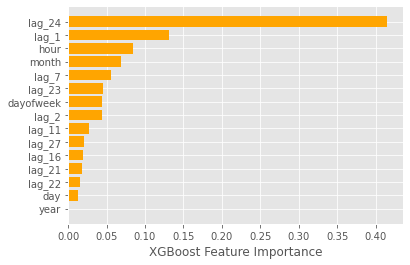

In [188]:
# feature importance
predictors = [x for x in X_train.columns]
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, predictors).sort_values(ascending=True)
plt.barh(xgb_feature_importance.index, 
        xgb_feature_importance, 
        color='orange')
plt.xlabel("XGBoost Feature Importance")

In [ ]:
# select features based on importance weights
# fit model using each importance as a threshold
thresholds = sort(xgb_model.feature_importances_)

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

In [201]:
# fit the model
selected_model = xgb.XGBRegressor()
selected_model.fit(select_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>
	  
I would advise against doing feature selection/hyperparameter tuning etc. using the train set. This will probably lead to overfitting
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

I hope I did it right this time...(I had done it the previous (incorrect) way in the Numerical Methods project, and did not get corrected). 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>
	  
Ok, I don't think the code does what you wanted it to do. As far as I understand, the code is going through the unsorted list of feature importances and using them as thresholds to transform the train and test set with SelectFromModel transformer which selects the features with importances >= threshold. But the model is trained only once: before this loop. So the performance of the models trained on subsets of features is never compared, and the selected threshold is just the last in the list. To make it do what you want, you'd have to retrain the model on the subsets of features, cross-validate it and then select the best threshold.
    
This is not required in this project, so I think I won't torture you anymore and leave this for you to try on your own if you want :)
	  
</div>

Do cross validation with RandomizedSearchCV.

In [211]:
# specify your configurations as dictionaries
params = {'objective': ['reg:squarederror'],
          'eval_metric': ['rmse'],
          #'booster': ['gbtree'], # default value
          'max_depth': [6, 10], 
          'eta':[0.1, 0.3] # deafault = 0.3 (equivalent to learning rate)
        }

start = time.time()
print("Starting the training at", start)

xgb_model2 = xgb.XGBRegressor()
search_grid = RandomizedSearchCV(xgb_model2, param_distributions=params, verbose=50, cv=tscv, random_state=12345)
search_grid.fit(X_train, y_train)

end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1638379169.74977
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10; 1/4] START eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror
[CV 1/10; 1/4] END eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror;, score=0.488 total time=   0.0s
[CV 2/10; 1/4] START eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror
[CV 2/10; 1/4] END eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror;, score=0.508 total time=   0.1s
[CV 3/10; 1/4] START eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror
[CV 3/10; 1/4] END eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror;, score=0.478 total time=   0.1s
[CV 4/10; 1/4] START eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror
[CV 4/10; 1/4] END eta=0.1, eval_metric=rmse, max_depth=6, objective=reg:squarederror;, score=0.486 total time=   0.1s
[CV 5/10; 1/4] START eta=0.1, eval_metric=rmse, max_depth=6, objectiv

Do hyperparameter tuning with Optuna. 

In [175]:
def objective(trial, X_df, y_df):
    

    xgb__max_depth = trial.suggest_int('max_depth', 6, 10)
    xgb__eta = trial.suggest_float('eta', 0.1, 0.3)
   
    params = {
        'max_depth': xgb__max_depth,
        'eta': xgb__eta
    }

    xgb_model3 = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', **params)
    scores = cross_val_score(xgb_model3, X_df, y_df, cv=tscv, scoring='neg_mean_squared_error') 

    return np.sqrt(np.mean(np.abs(scores)))

In [176]:
study = optuna.create_study(direction="minimize", study_name="XGBoostRegressor")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=5)

[I 2021-12-01 18:06:21,871] A new study created in memory with name: XGBoostRegressor
[I 2021-12-01 18:06:24,179] Trial 0 finished with value: 25.58107010413183 and parameters: {'max_depth': 6, 'eta': 0.22041272271605544}. Best is trial 0 with value: 25.58107010413183.
[I 2021-12-01 18:06:29,450] Trial 1 finished with value: 27.167594481260238 and parameters: {'max_depth': 10, 'eta': 0.26883766043425805}. Best is trial 0 with value: 25.58107010413183.
[I 2021-12-01 18:06:32,939] Trial 2 finished with value: 25.814114836449292 and parameters: {'max_depth': 8, 'eta': 0.13466573081727404}. Best is trial 0 with value: 25.58107010413183.
[I 2021-12-01 18:06:38,551] Trial 3 finished with value: 26.882259336698556 and parameters: {'max_depth': 10, 'eta': 0.18162861109112632}. Best is trial 0 with value: 25.58107010413183.
[I 2021-12-01 18:06:41,608] Trial 4 finished with value: 25.663995771690423 and parameters: {'max_depth': 7, 'eta': 0.15872796377989268}. Best is trial 0 with value: 25.5810

In [214]:
print(f"\tBest value (RMSE): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (RMSE): 25.58107
	Best params:
		max_depth: 6
		eta: 0.22041272271605544


<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

After correcting the resampling method, I reran all the models and tried tuning them. Below is the conclusion.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
There's no need tune hyperparameters twice: once with `RandomizedSearchCV` and then with optuna (although for optuna you're using a better strategy of taking parameters using a random distribution (e.g. `trial.suggest_int('max_depth', 6, 10)` will return values between 6 and 10 randomly, so it can return 8 for example, while when you pass the parameter like this: `'max_depth': [6, 10]` to RandomizedSearchCV, it can only get 6 or 10, to get other values you need to use some radnom distribution, using `scipy.stats` or something (here's [an example](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization))). If you're comfortable with optuna, it generally produces better results that `RandomizedSearchCV`, and it's easier to define distributions of parameters.
	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>
	  
There's a problem however, that you're tuning hyperparameters using the train set with optuna, which leads to overfitting (compare with the code you used for linear regression: there you use cross_val_score with time series split)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

I added cross validation with tscv (the cv that I got from TimeSeriesSplit earlier). 
    
I know it is not necessary to run both RandomizedSearchCV and Optuna, but I read somewhere that doing the same thing with different methods makes sure that you are doing it right and also gives you an idea of the range of outcomes to expect. But I will stick to Optuna only from now because it is indeed redundant. I am still far from feeling confident at using Optuna, but its logic speaks to me (you set a range for Optuna to figure out rather than a sorry choice of a few fixed guessed values). 
   
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>
	  
Ok, great! Yeah, well, you can do the same thing with RandomizedSearchCV, but it's a little bit more complicated, and overall, optuna is more intelligent, because it's based on bayesian optimization (so e.g. if some region in hyperparameter space produces bad results, it is less likely to keep samplin from there, while with RandomizedSearchCV, there's nothing like this)
	  
</div>

## Testing

**Linear Regression**

In [64]:
lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [65]:
print("RMSE for the test set: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for the test set:  44.57016968505944


* The RMSE is below the baseline and does meet the project threshold. 

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
It does though! I guess, this comment is from the previous version :)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

Oh right! I though the project threshold was 40!
   
</div>

**ARIMA**

In [204]:
# the training dataset ends at 2018-08-13 13:00:00
# the test dataset starts at 2018-08-13 14:00:00 and ends at 2018-08-31 23:00:00
start_index = '2018-08-13 14:00:00'
end_index = '2018-08-31 23:00:00'
forecast = arima_model_fit.predict(start=start_index, end=end_index)

In [205]:
# evaluate forecasts on the test dataset
rmse_arima_test = np.sqrt(mean_squared_error(test_arima['num_orders'], forecast))
print('ARIMA model RMSE on test dataset:', rmse_arima_test) # (24, 1, 25) 50.270941048167245

ARIMA model RMSE on test dataset: 59.991555754805006


* The RMSE score on the validation dataset was 33.66. The RMSE almost doubled for the test dataset, compared to the training dataset. It is below the baseline, but still above the project threshold. 

In [206]:
start_index = '2018-08-13 14:00:00'
end_index = '2018-08-31 23:00:00'
forecast2 = auto_arima_model1_fit.predict(start=start_index, end=end_index)

In [207]:
# evaluate forecasts on the test dataset
rmse_arima2_test = np.sqrt(mean_squared_error(test_arima['num_orders'], forecast2))
print('ARIMA model RMSE on test dataset:', rmse_arima2_test) # (2, 0, 0)

ARIMA model RMSE on test dataset: 87.35657921808772


* This is the performance of the model with the optimal set of p, d, q values as found by auto_arima. Its RMSE score on the validation dataset was 58.10. The order values were less optimal than those found by manually running ACF and PACF tests. 

**ETS**

In [66]:
forecast_ets_test = ets_model_fit.predict(0, len(test_arima)-1)

In [67]:
# evaluate forecasts on the test dataset
rmse_ets_test = np.sqrt(mean_squared_error(test_arima['num_orders'], forecast_ets_test))
print('ETS model RMSE on test dataset:', rmse_ets_test)

ETS model RMSE on test dataset: 105.29238783348255


* The RMSE triped for the test dataset, compared to the training dataset. Though it is above the baseline, it is still way below the project threshold. 

**Prophet**

In [ ]:
# prepare the prediction period until the last date in the test dataset (2018-08-31 23:00:00)
future = m.make_future_dataframe(periods=442, freq='H')

In [ ]:
# generate the predictions
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# extract 'yhat' for 2018-08-13 14:00:00 until 2018-08-31 23:00:00 and compare to test_prophet['ds']
forecast_prophet_test = forecast.query('ds >= "2018-08-13 14:00:00" & ds <= "2018-08-31 23:00:00"')['yhat']

In [ ]:
# evaluate forecasts on the training dataset
rmse_prophet_test = np.sqrt(mean_squared_error(test_prophet['y'], forecast_prophet_test))
print('Prophet model RMSE on test dataset:', rmse_prophet_test)

* Prophet beat the baseline RMSE score and has passed the project threshold. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Unfortunately, the results are invalid, because you were solving a very different task, as explained in a comment in the beginning of the notebook.
	  
</div>

**XGBoostRegressor**

In [208]:
# (A) transform the test dataset according to the weights of feature importance
start = time.time()
print("Starting the prediction at", start)

y_pred = selected_model.predict(select_X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Starting the prediction at 1638379146.843711
RMSE: 61.18147424399374


In [212]:
# (B) the result of cross validation with RandomizedSearchCV - eta=0.3, eval_metric=rmse, max_depth=10
start = time.time()
print("Starting the prediction at", start)

y_pred = search_grid.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1638379190.4356613
RMSE: 45.373007556024284
Ending the prediction at 1638379190.4426515
0.006990194320678711 s


In [215]:
# (C) the result of hyperparameter tuning with cross validation in Optuna - max_depth=6, eta=0.22041272271605544

start = time.time()
print("Starting the prediction at", start)

xgb_model4 = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', max_depth=6, eta=0.22041272271605544)
xgb_model4.fit(X_train, y_train)
y_pred = xgb_model4.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1638379350.3559978
RMSE: 47.833957841814545
Ending the prediction at 1638379350.7280416
0.3720438480377197 s


<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Yeah, this is what I meant: when tuning hypeprarameters on the train set, the result is overfitting
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment V3</b>

I added cross validation with tscv (the cv that I got from TimeSeriesSplit earlier). 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Cool!
	  
</div>

# Conclusion

* Linear Regression and XGBoostRegression (hyperparameters tuned by RandomizedSearchCV) managed to pass the project threshold.
* ARIMA and ETS did not show a good performance as expected. 
* Prophet is very difficult to set up but if it works, it could be promising. 


* ACF and PACF plots were very effective at pinpointing the optimal values of the p (the number of time lags), d (the degree of differencing) and q (the order of the moving average) parameters in the ARIMA model.
* First time differences are usually known to help increase a model's performance when dealing with time series data, but it had a very negative effect on the linear regression model. 
* Transforming the dataset by natural log also did not help bring a better model performance. 

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48